In [1]:
import pandas as pd
from datetime import datetime, timedelta
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
import random 
import math

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr 

import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import display_html

In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

### Loading DataFrame

In [3]:
train_df = pd.read_csv('../data/raw_data2.csv')

In [4]:
train_df.shape

(10000, 55)

In [5]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [6]:
train_df.select_dtypes(include=['object']).shape

(10000, 10)

In [7]:
train_df.select_dtypes(exclude=['object']).shape

(10000, 45)

In [8]:
train_df.describe()

,State_of_Charge,State_of_Health,Voltage,Current,Temperature,Cycling_Count,Internal_Resistance,Rate_of_Charge,Charge_Discharge_Efficiency,Depth_of_Discharge,...,Payload_Distribution,Payload_Changes,Trailer_Attachment,Start_Stop_Frequency,Auxiliary_Power_Usage,Truck_Speed,Acceleration,Climate_Control_Usage,Battery_Health,Battery_Class
count,10000.000000,7889.000000,9877.000000,7383.000000,10000.000000,10000.000000,8711.000000,9770.000000,7047.000000,8748.000000,...,10000.000000,10000.000000,8528.000000,10000.000000,10000.000000,10000.000000,10000.000000,8860.000000,10000.000000,10000.000000
mean,0.816176,0.932834,362.821657,39.962486,82.932792,717.109003,2.496340,0.325186,0.849597,0.299452,...,0.500007,0.499749,0.499891,2.994098,0.501957,59.916809,1.505237,0.575228,80.139787,0.543700
std,10.689987,14.392364,117.335837,25.291775,41.366994,301.937420,0.497697,16.594243,0.050272,0.100370,...,0.050230,0.050322,0.100300,0.996848,0.100142,9.978657,0.498113,5.998849,10.039971,0.498112
min,-99.809938,-99.671046,-99.995932,-99.875209,-99.980632,-99.729607,0.491961,-99.651984,0.647121,-0.079134,...,0.316873,0.290411,0.173977,-0.576813,0.094076,23.231151,-0.490173,-99.498439,42.247601,0.000000
25%,0.631865,0.862549,390.660709,36.348946,64.379650,603.024419,2.163031,0.424158,0.815698,0.231732,...,0.466041,0.465419,0.431610,2.306491,0.434686,53.296697,1.173766,0.430559,73.397271,0.000000
50%,0.701023,0.899001,398.664392,44.248450,87.388963,767.154933,2.497047,0.499461,0.849719,0.299539,...,0.499883,0.499023,0.498565,2.990969,0.501822,59.909988,1.503737,0.499525,80.110544,1.000000
75%,0.770734,0.934845,405.917877,51.662514,108.488276,913.695966,2.834816,0.572947,0.883375,0.368620,...,0.534042,0.533611,0.566641,3.681831,0.570197,66.735104,1.837816,0.568163,86.985181,1.000000
max,99.869601,99.761255,438.081088,99.496630,193.639722,1609.425533,4.600857,99.887761,1.029299,0.743115,...,0.700629,0.697938,0.868084,6.559338,0.880136,94.691845,3.577547,99.374396,118.197256,1.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    7919 non-null   object 
 1   State_of_Charge              10000 non-null  float64
 2   State_of_Health              7889 non-null   float64
 3   Voltage                      9877 non-null   float64
 4   Current                      7383 non-null   float64
 5   Temperature                  10000 non-null  float64
 6   Cycling_Count                10000 non-null  float64
 7   Internal_Resistance          8711 non-null   float64
 8   Rate_of_Charge               9770 non-null   float64
 9   Charge_Discharge_Efficiency  7047 non-null   float64
 10  Depth_of_Discharge           8748 non-null   float64
 11  Charge_Rate                  9180 non-null   float64
 12  Discharge_Rate               10000 non-null  float64
 13  Voltage_Sag      

#### Checking Missing Values

In [10]:
train_df.isna().sum().head(20)

Timestamp                      2081
State_of_Charge                   0
State_of_Health                2111
Voltage                         123
Current                        2617
Temperature                       0
Cycling_Count                     0
Internal_Resistance            1289
Rate_of_Charge                  230
Charge_Discharge_Efficiency    2953
Depth_of_Discharge             1252
Charge_Rate                     820
Discharge_Rate                    0
Voltage_Sag                    1704
Cell_Balancing_Status          1242
Self_Discharge_Rate               0
EIS_Data                          0
Cycle_Life                        0
Max_Charge_Power                  0
Max_Discharge_Power               0
dtype: int64

In [11]:
train_df.drop('Timestamp',axis=1,inplace=True)

In [12]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (total / len(train_df)) * 100
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage']).reset_index()

In [13]:
missing_df.drop('Total',axis=1,inplace=True)

In [14]:
# df2_styler = missing_df.tail(20).style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
df1_styler = missing_df.head(15).style.set_table_attributes("style='display:inline'")
df2_styler = missing_df.iloc[15:30,:].style.set_table_attributes("style='display:inline'")
df3_styler = missing_df.iloc[30:45,:].style.set_table_attributes("style='display:inline'")
df4_styler = missing_df.tail(10).style.set_table_attributes("style='display:inline'")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,index,Percentage
0,Road_Type,30.460000
1,Charge_Discharge_Efficiency,29.530000
2,Current,26.170000
3,State_of_Health,21.110000
4,Calendar_Aging,20.580000
5,Anode_Degradation,17.560000
6,Voltage_Sag,17.040000
7,Rate_of_Discharge_Peak,15.860000
8,Trailer_Attachment,14.720000
9,Regenerative_Braking,13.990000


In [15]:
cat_columns = train_df.select_dtypes(['object','category']).columns.to_list()
num_columns = train_df.select_dtypes(['int','float']).columns.to_list()

In [16]:
num_columns.remove('Battery_Health')
num_columns.remove('Battery_Class')

In [17]:
len(num_columns) + len(cat_columns) 

52

In [18]:
num_columns

['State_of_Charge',
 'State_of_Health',
 'Voltage',
 'Current',
 'Temperature',
 'Cycling_Count',
 'Internal_Resistance',
 'Rate_of_Charge',
 'Charge_Discharge_Efficiency',
 'Depth_of_Discharge',
 'Charge_Rate',
 'Discharge_Rate',
 'Voltage_Sag',
 'Cell_Balancing_Status',
 'Self_Discharge_Rate',
 'EIS_Data',
 'Cycle_Life',
 'Max_Charge_Power',
 'Max_Discharge_Power',
 'Anode_Degradation',
 'Cathode_Degradation',
 'Electrolyte_Level',
 'Chemical_Composition',
 'Rate_of_Charge_Peak',
 'Rate_of_Discharge_Peak',
 'Calendar_Aging',
 'Cell_Voltage_Balance',
 'Altitude_Change',
 'Tire_Pressure',
 'Regenerative_Braking',
 'Load_Weight',
 'Road_Inclination',
 'Idle_Time',
 'Charging_Time',
 'Charging_Frequency',
 'Payload_Distribution',
 'Payload_Changes',
 'Trailer_Attachment',
 'Start_Stop_Frequency',
 'Auxiliary_Power_Usage',
 'Truck_Speed',
 'Acceleration',
 'Climate_Control_Usage']

#### Applying KNN imputer for numerical variables

In [19]:
from sklearn.impute import KNNImputer

In [20]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=4)
imputer.fit(train_df[num_columns])
train_df[num_columns] = imputer.transform(train_df[num_columns])

In [21]:
for col in train_df[cat_columns].columns:
    missing_len = train_df[col].isna().sum()
    li = train_df[~(train_df[col].isna())][col].to_list()
    train_df.loc[train_df[col].isna(),col] = [random.choice(li) for x in range(0, missing_len)]

In [23]:
# df2_styler = missing_df.tail(20).style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (total / len(train_df)) * 100
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage']).reset_index()
missing_df.drop('Total',axis=1, inplace=True)

df1_styler = missing_df.head(15).style.set_table_attributes("style='display:inline'")
df2_styler = missing_df.iloc[15:30,:].style.set_table_attributes("style='display:inline'")
df3_styler = missing_df.iloc[30:44,:].style.set_table_attributes("style='display:inline'")
df4_styler = missing_df.tail(10).style.set_table_attributes("style='display:inline'")

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,index,Percentage
0,State_of_Charge,0.000000
1,Truck_Speed,0.000000
2,Regenerative_Braking,0.000000
3,Load_Weight,0.000000
4,Road_Inclination,0.000000
5,Idle_Time,0.000000
6,Charging_Time,0.000000
7,Charging_Frequency,0.000000
8,Payload_Distribution,0.000000
9,Payload_Changes,0.000000


In [24]:
train_df['Battery_Class'].value_counts(normalize=True)

Battery_Class
1    0.5437
0    0.4563
Name: proportion, dtype: float64

In [25]:
train_df[['Driving_Pattern','Weather_Conditions']].head(10)

,Driving_Pattern,Weather_Conditions
0,Gentle,Snowy
1,Aggressive,Rainy
2,36.23137793320302,Rainy
3,Moderate,Snowy
4,Gentle,Rainy
5,Aggressive,Rainy
6,Gentle,Rainy
7,Moderate,Snowy
8,Gentle,Snowy
9,Aggressive,Sunny


#### Cleaning noise from categorical columns and imputing it with mode

In [26]:
# Loop through all columns
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = [str(x) for x in train_df[col]]
        # Check if each element in the column can be converted to a numeric value
        numeric_mask = pd.to_numeric(train_df[col], errors='coerce').notna()
        
        if numeric_mask.any():
            # Find the mode of the column excluding the numeric values
            mode_val = train_df.loc[~numeric_mask, col].mode()[0]
            
            # Replace numeric values with the mode
            train_df.loc[numeric_mask, col] = mode_val



In [27]:
train_df[['Driving_Pattern','Weather_Conditions']].head(10)

,Driving_Pattern,Weather_Conditions
0,Gentle,Snowy
1,Aggressive,Rainy
2,Gentle,Rainy
3,Moderate,Snowy
4,Gentle,Rainy
5,Aggressive,Rainy
6,Gentle,Rainy
7,Moderate,Snowy
8,Gentle,Snowy
9,Aggressive,Sunny


#### Dropping Duplicates

In [28]:
train_df = train_df.drop_duplicates(keep='last')

#### Check and Treat Outliers

In [29]:
# Define a function to detect and treat outliers in each column
def treat_outliers(df, method='z-score', threshold=2):
    treated_df = df.copy()  # Create a copy of the original DataFrame
    outliers_info = {}  # Dictionary to store column names and outlier percentages
    
    for col in treated_df.columns:
        column_data = treated_df[col]
        if method == 'z-score':
            z_scores = np.abs((column_data - column_data.mean()) / column_data.std())
            outliers = z_scores > threshold
        elif method == 'IQR':
            Q1 = column_data.quantile(0.25)
            Q3 = column_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = (column_data < lower_bound) | (column_data > upper_bound)
        
        # Calculate the percentage of outliers in the column
        percent_outliers = (outliers.sum() / len(column_data)) * 100
        if percent_outliers > 0:
            outliers_info[col] = percent_outliers  # Store column name and outlier percentage
        
        # Replace outliers with the median of the column
        treated_df.loc[outliers, col] = column_data.median()
    
    return treated_df, outliers_info

# Apply the treat_outliers function to the entire DataFrame using z-score method
train_df[num_columns], outliers_info = treat_outliers(train_df[num_columns], method='z-score', threshold=2)



In [30]:
outliers_info

{'State_of_Charge': 2.68,
 'State_of_Health': 3.84,
 'Voltage': 9.27,
 'Current': 4.53,
 'Temperature': 4.93,
 'Cycling_Count': 10.100000000000001,
 'Internal_Resistance': 4.96,
 'Rate_of_Charge': 5.38,
 'Charge_Discharge_Efficiency': 5.48,
 'Depth_of_Discharge': 4.93,
 'Charge_Rate': 4.63,
 'Discharge_Rate': 4.54,
 'Voltage_Sag': 6.13,
 'Cell_Balancing_Status': 6.35,
 'Self_Discharge_Rate': 4.68,
 'EIS_Data': 4.45,
 'Cycle_Life': 9.3,
 'Max_Charge_Power': 4.58,
 'Max_Discharge_Power': 4.47,
 'Anode_Degradation': 5.21,
 'Cathode_Degradation': 0.9900000000000001,
 'Electrolyte_Level': 4.63,
 'Chemical_Composition': 4.35,
 'Rate_of_Charge_Peak': 3.1399999999999997,
 'Rate_of_Discharge_Peak': 0.19,
 'Calendar_Aging': 5.66,
 'Cell_Voltage_Balance': 4.63,
 'Altitude_Change': 4.2299999999999995,
 'Tire_Pressure': 4.97,
 'Regenerative_Braking': 4.84,
 'Load_Weight': 4.3,
 'Road_Inclination': 4.93,
 'Idle_Time': 4.3999999999999995,
 'Charging_Time': 4.47,
 'Charging_Frequency': 6.04,
 'Payload

In [31]:
train_df['Battery_Class'].value_counts(normalize=True)

Battery_Class
1    0.5437
0    0.4563
Name: proportion, dtype: float64

In [32]:
train_df.drop('Battery_Health',axis= 1,inplace=True)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State_of_Charge              10000 non-null  float64
 1   State_of_Health              10000 non-null  float64
 2   Voltage                      10000 non-null  float64
 3   Current                      10000 non-null  float64
 4   Temperature                  10000 non-null  float64
 5   Cycling_Count                10000 non-null  float64
 6   Internal_Resistance          10000 non-null  float64
 7   Rate_of_Charge               10000 non-null  float64
 8   Charge_Discharge_Efficiency  10000 non-null  float64
 9   Depth_of_Discharge           10000 non-null  float64
 10  Charge_Rate                  10000 non-null  float64
 11  Discharge_Rate               10000 non-null  float64
 12  Voltage_Sag                  10000 non-null  float64
 13  Cell_Balancing_St

#### EDA

### Univariate Analysis

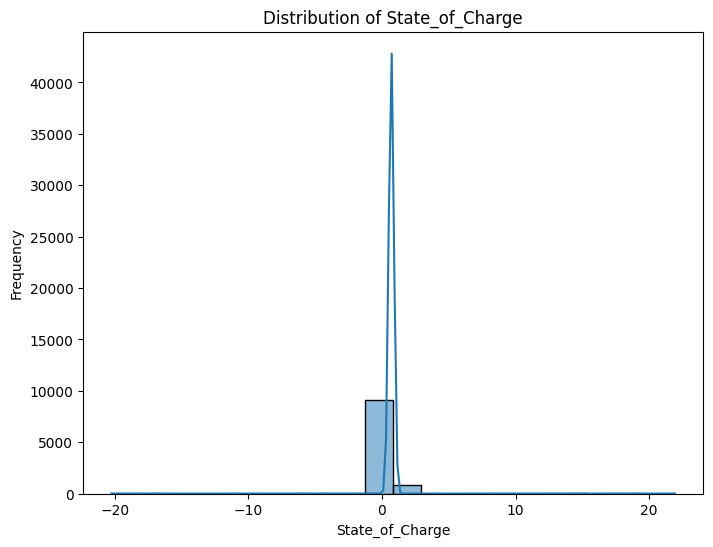

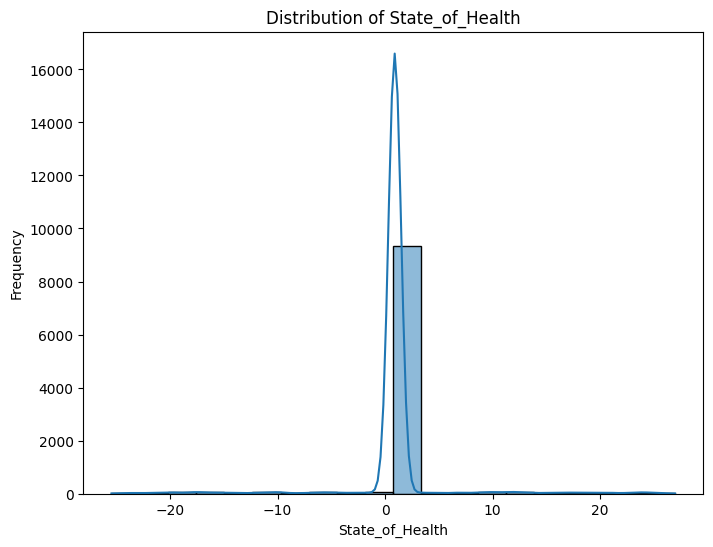

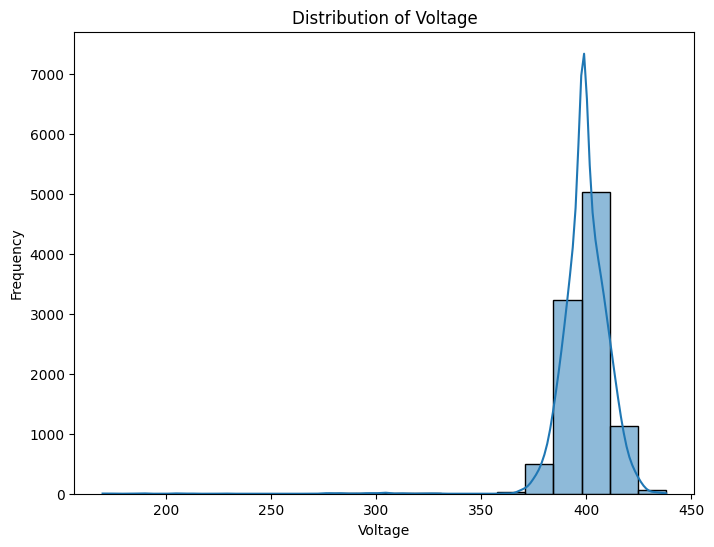

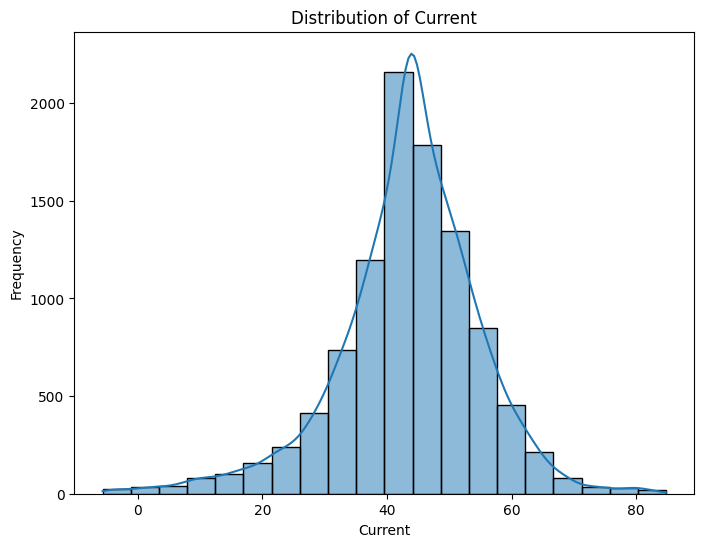

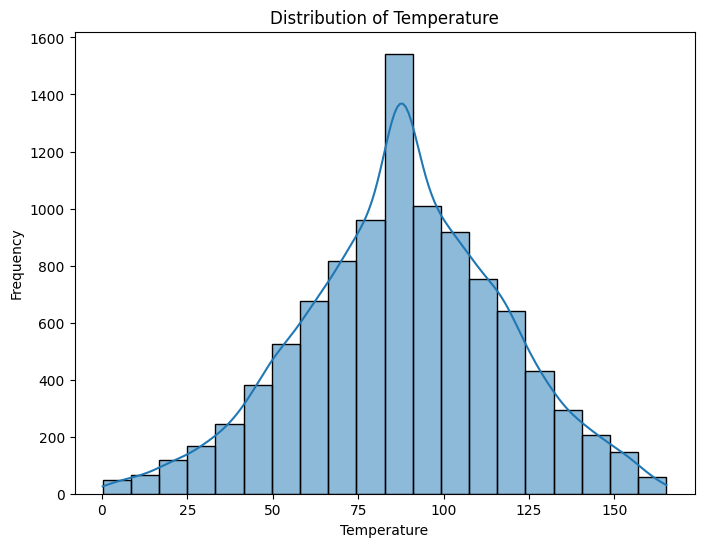

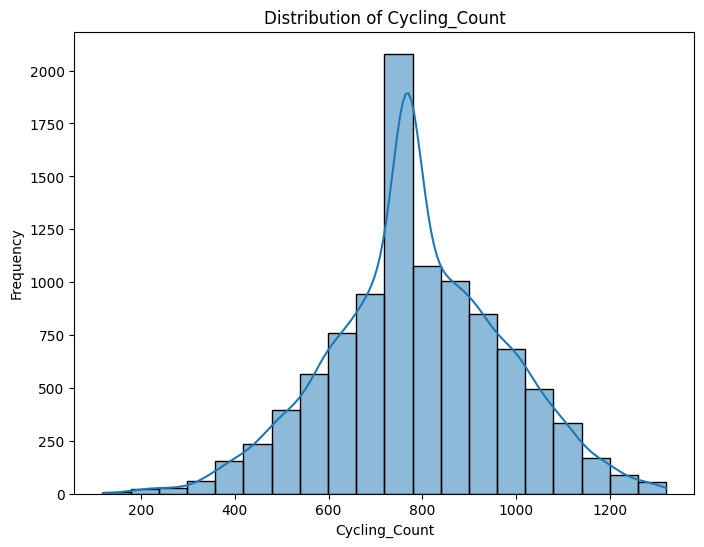

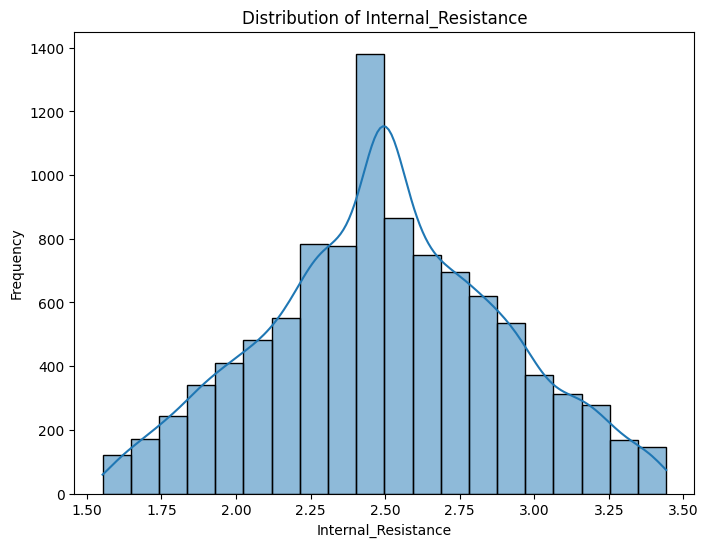

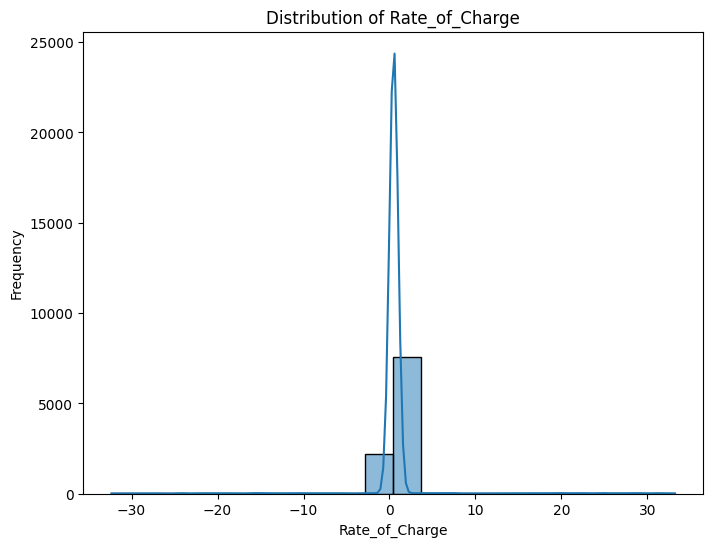

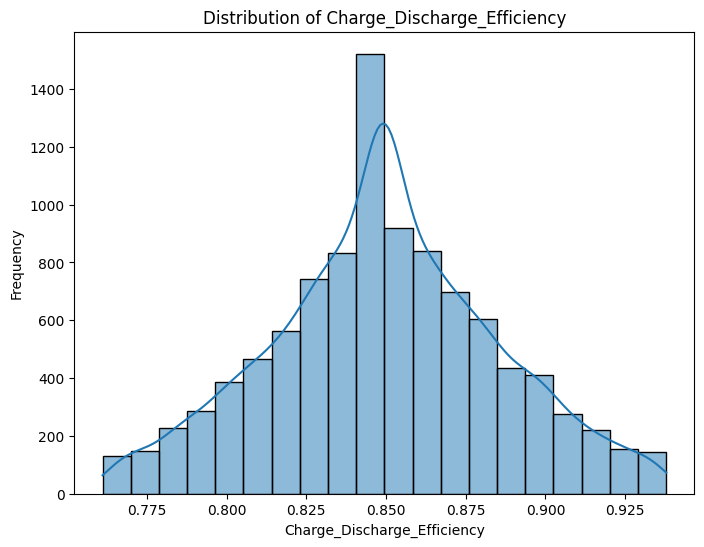

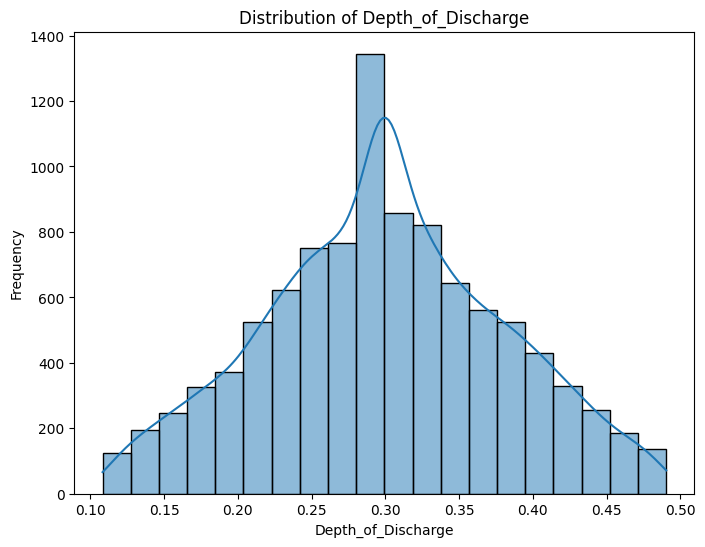

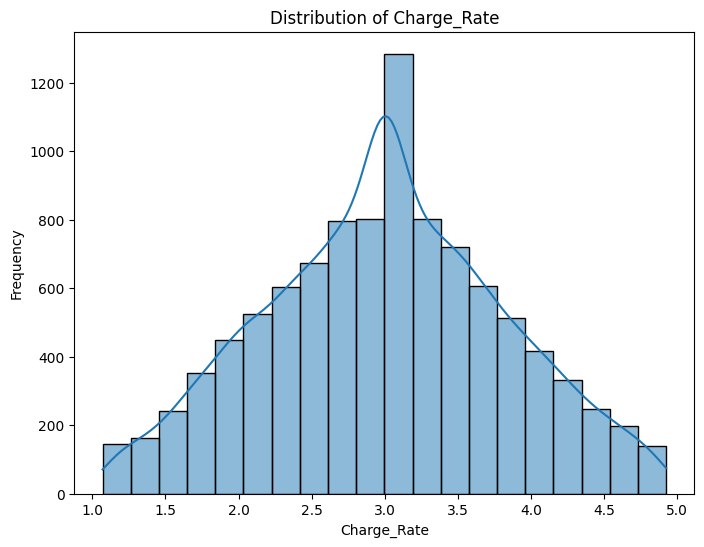

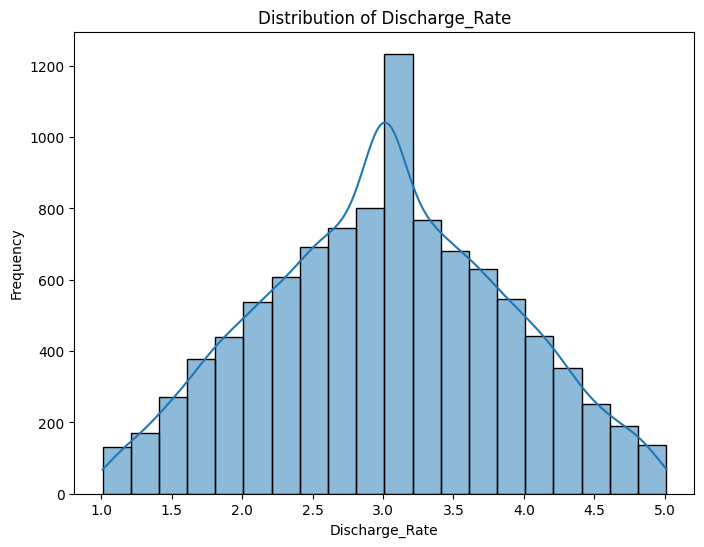

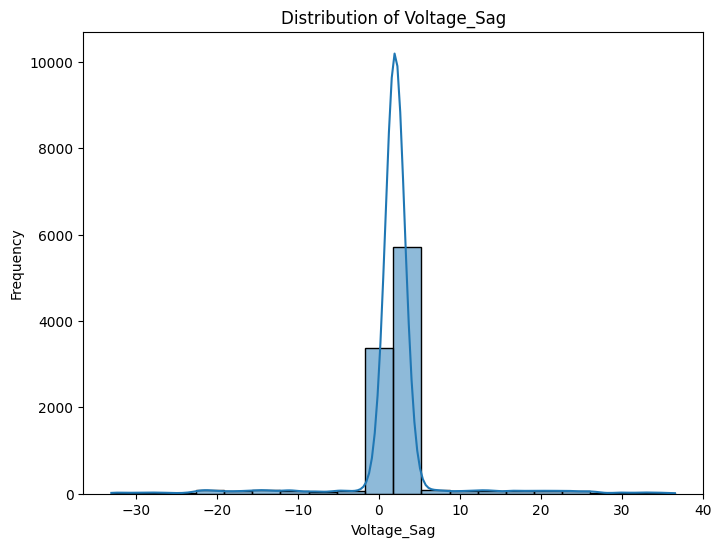

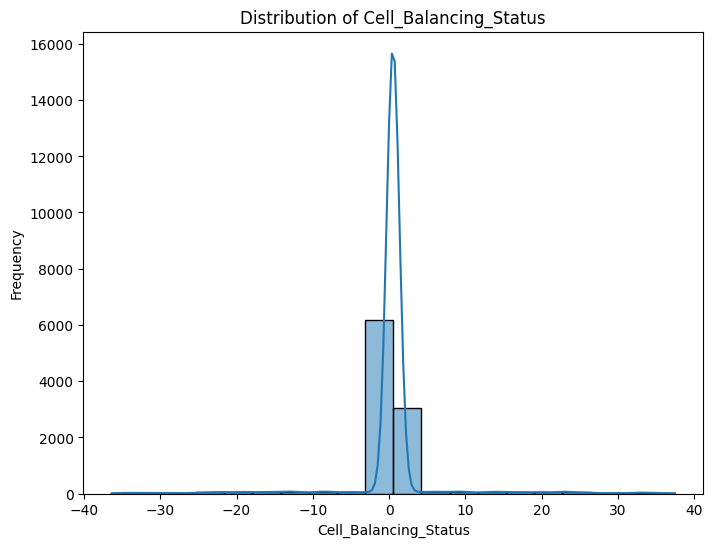

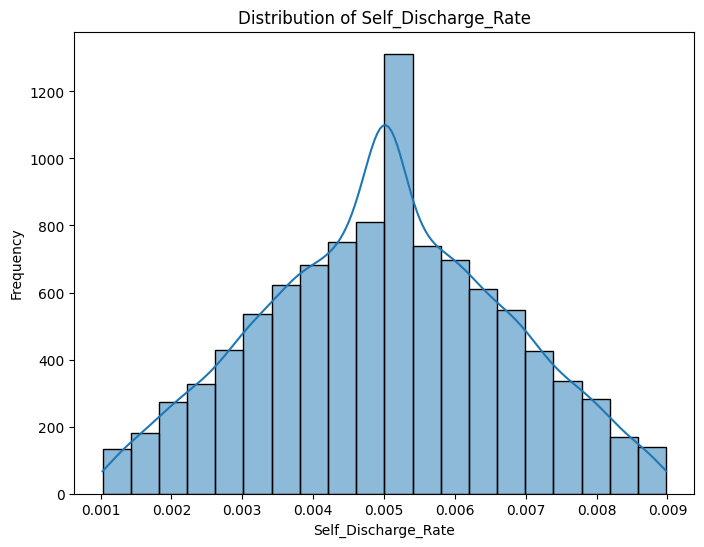

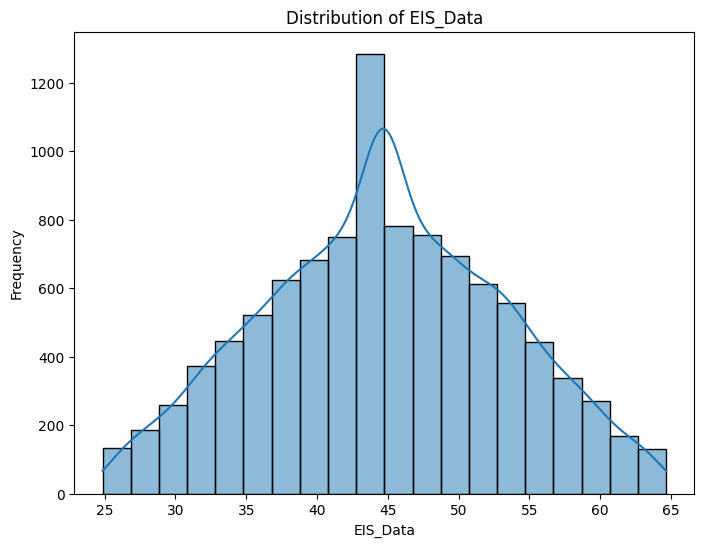

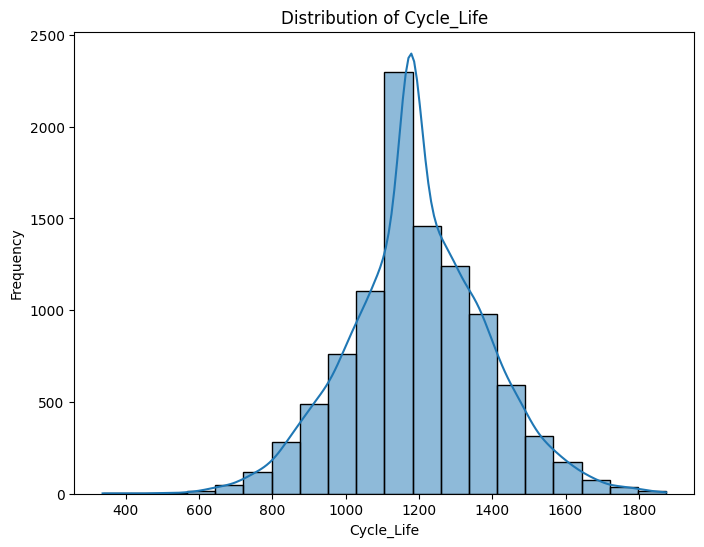

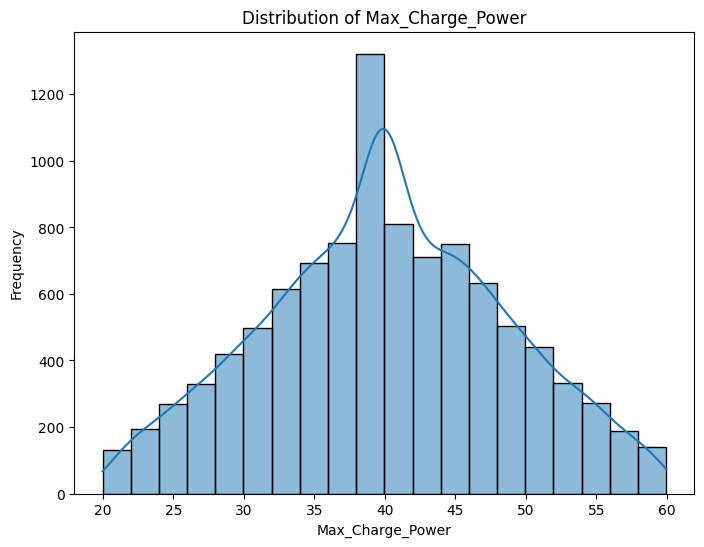

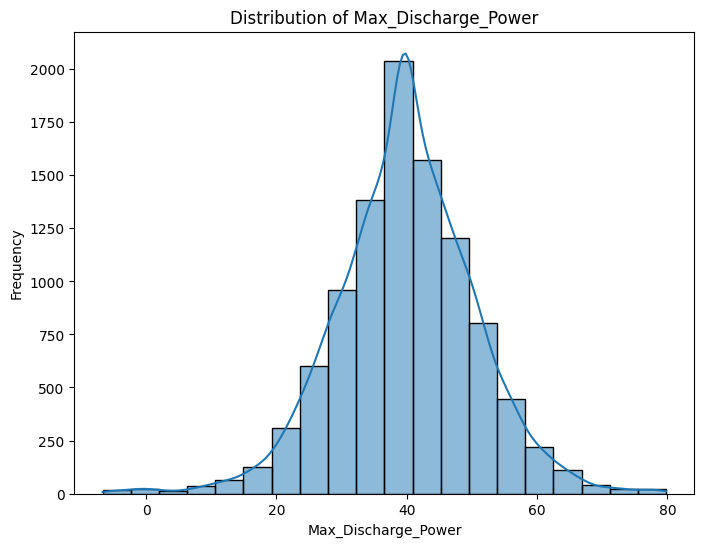

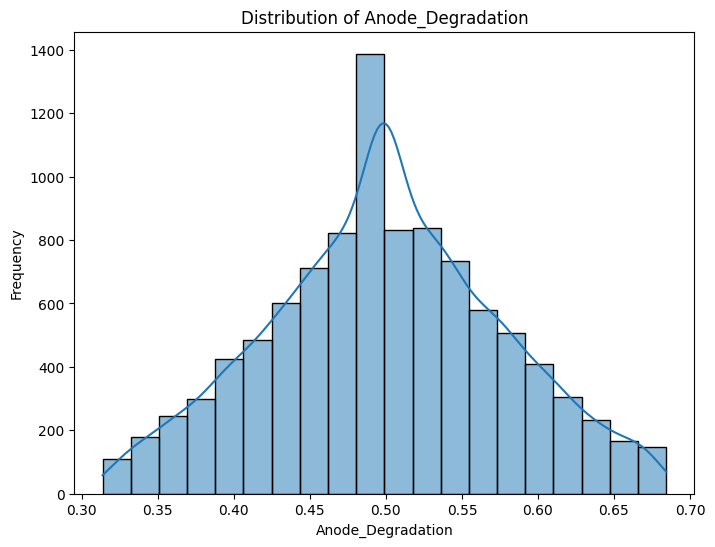

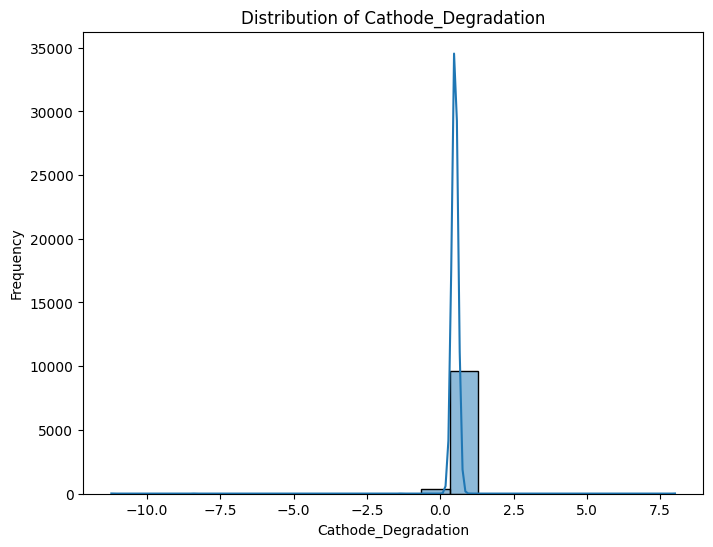

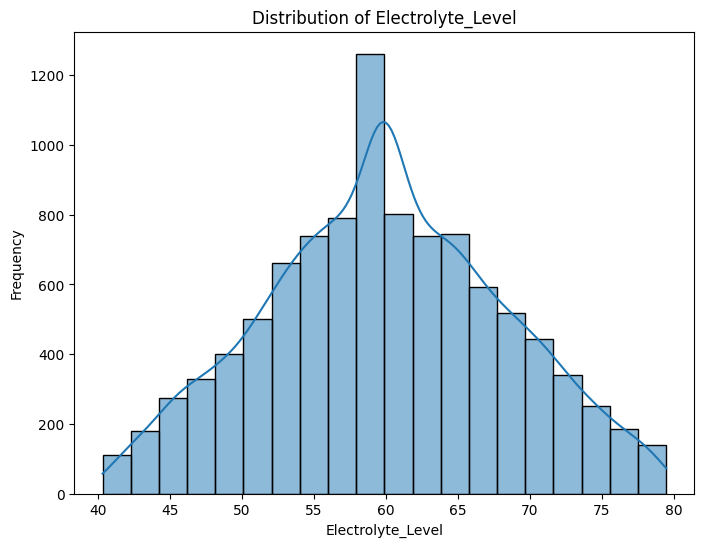

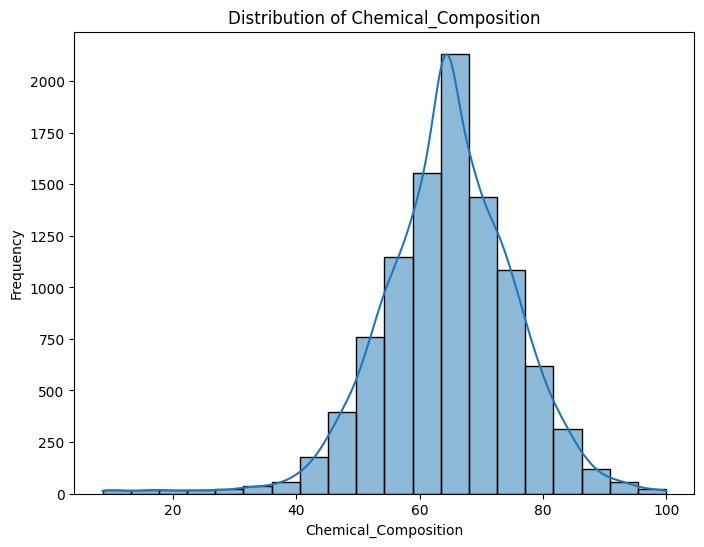

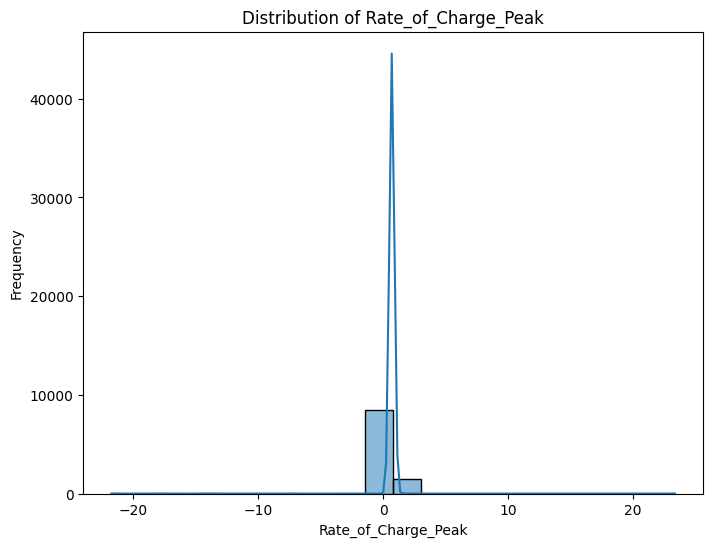

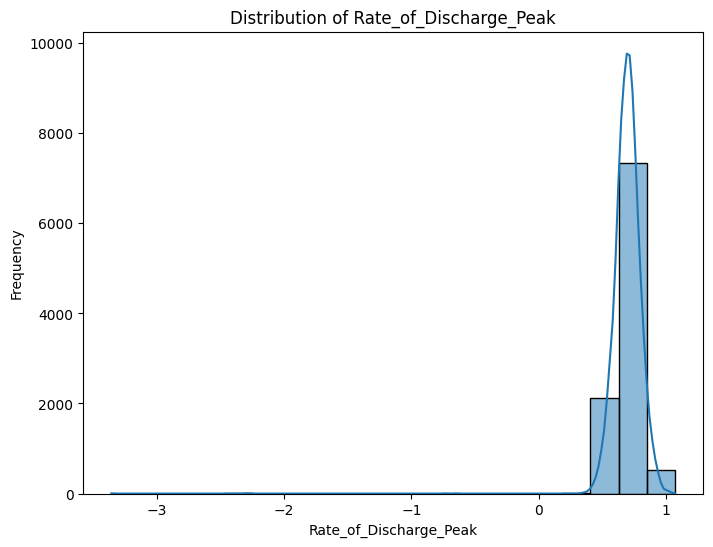

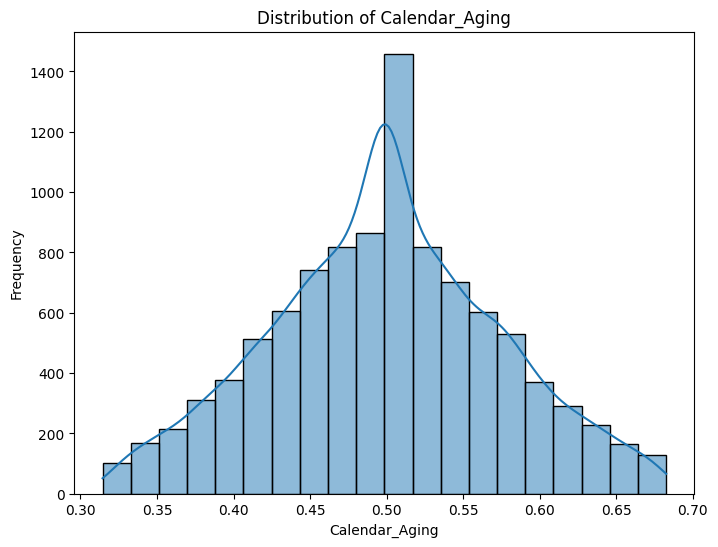

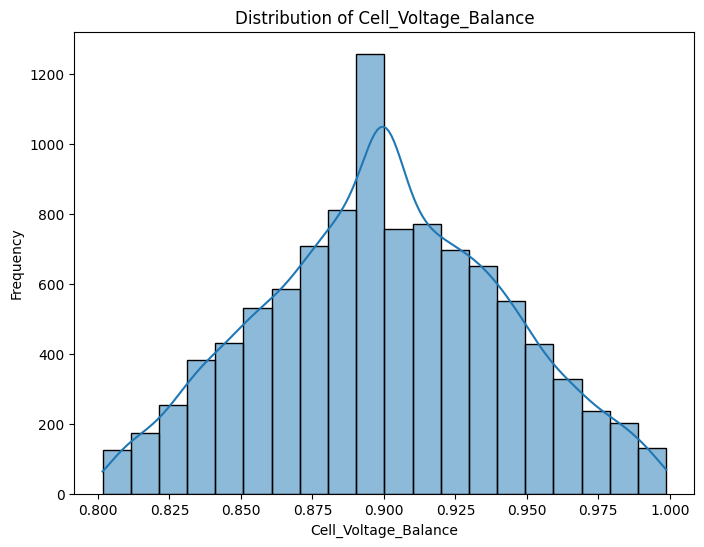

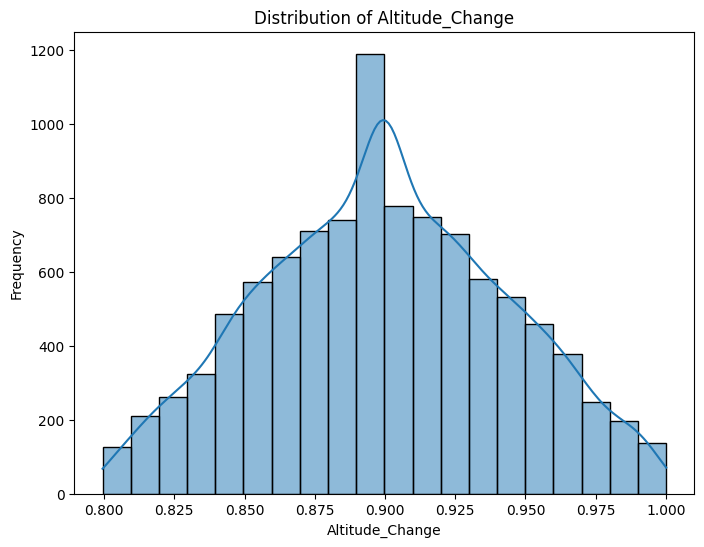

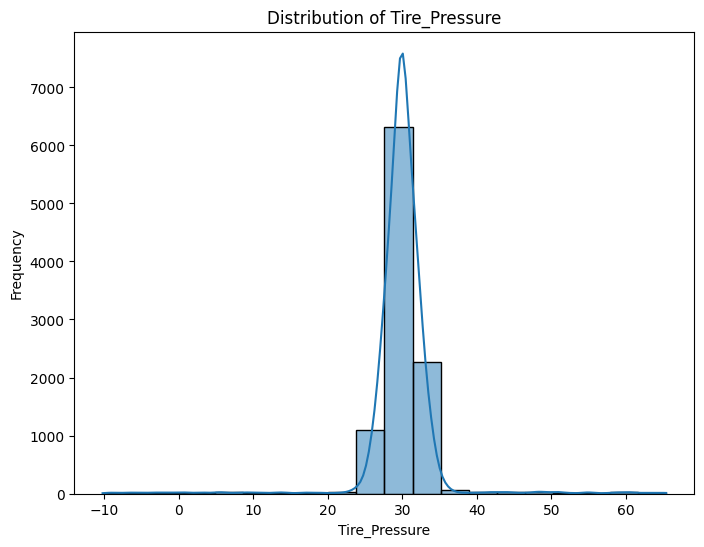

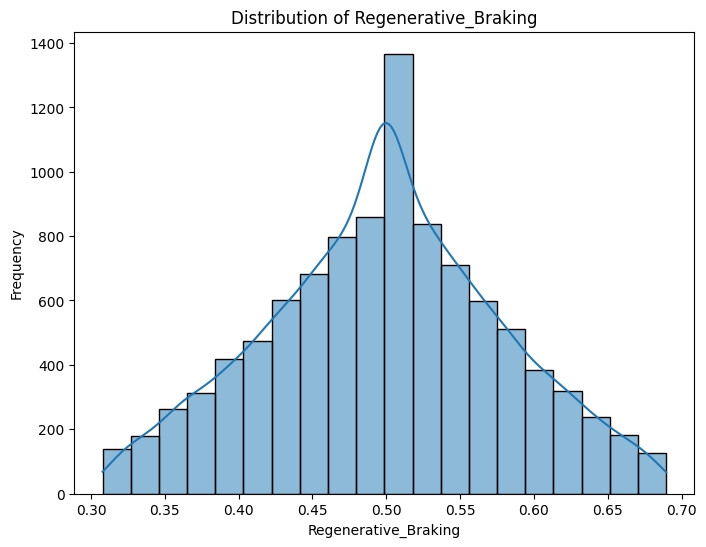

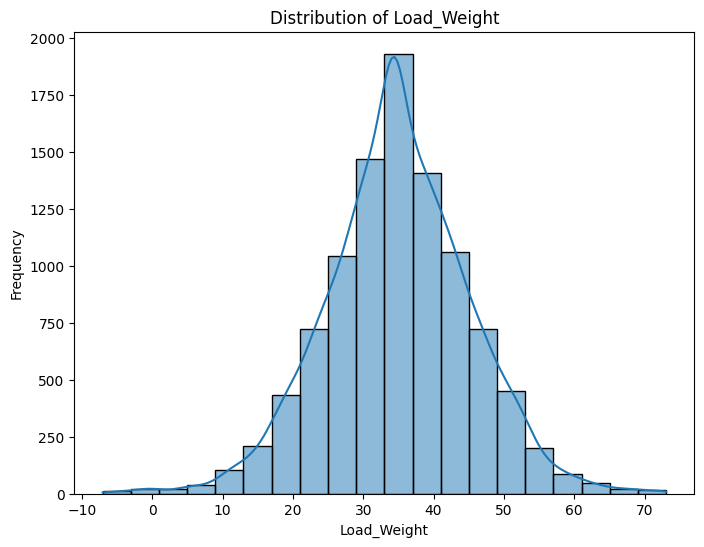

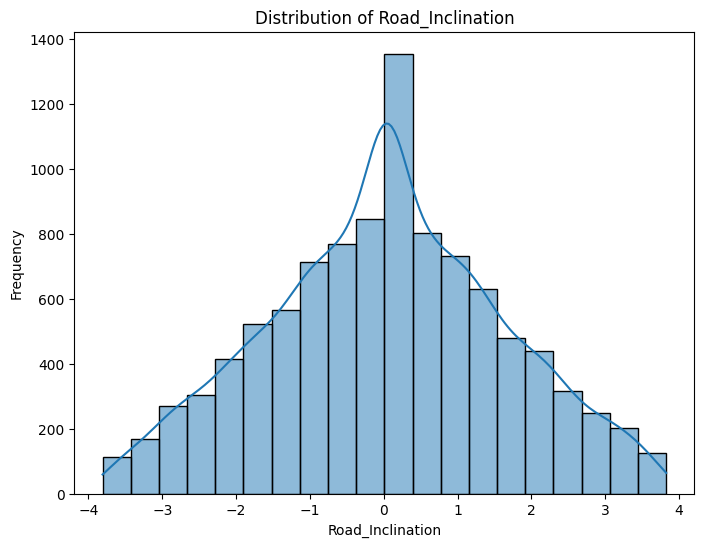

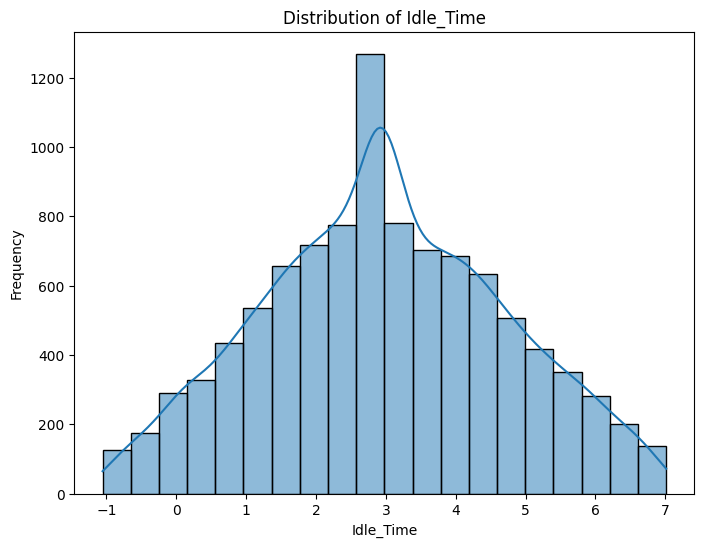

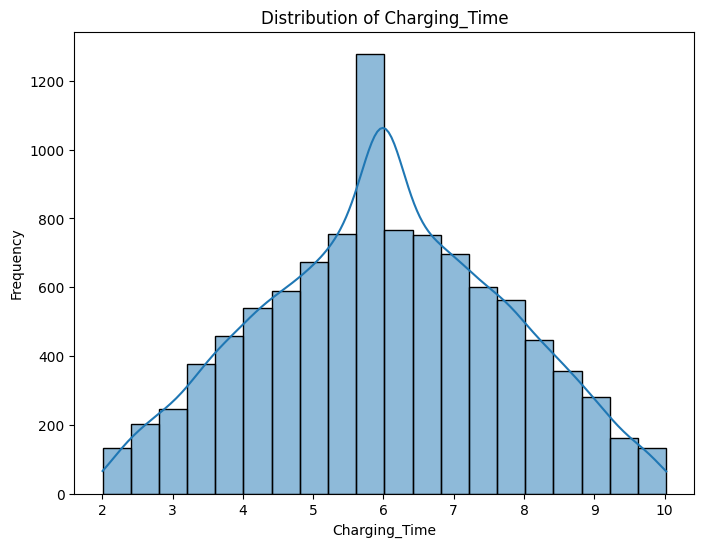

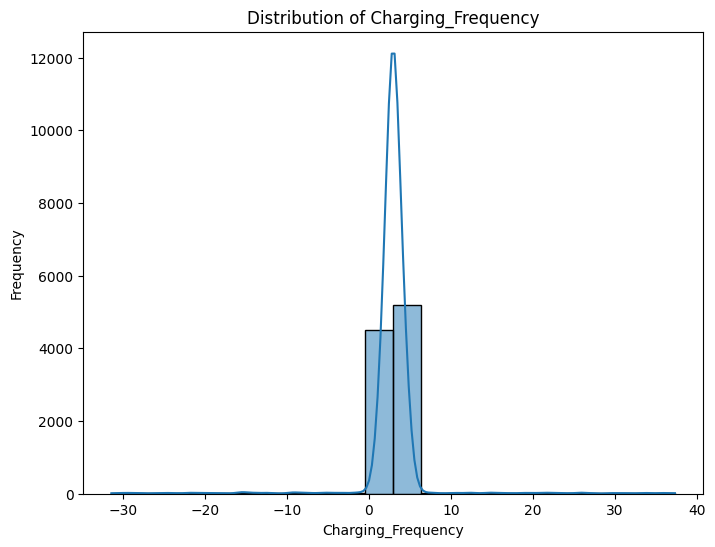

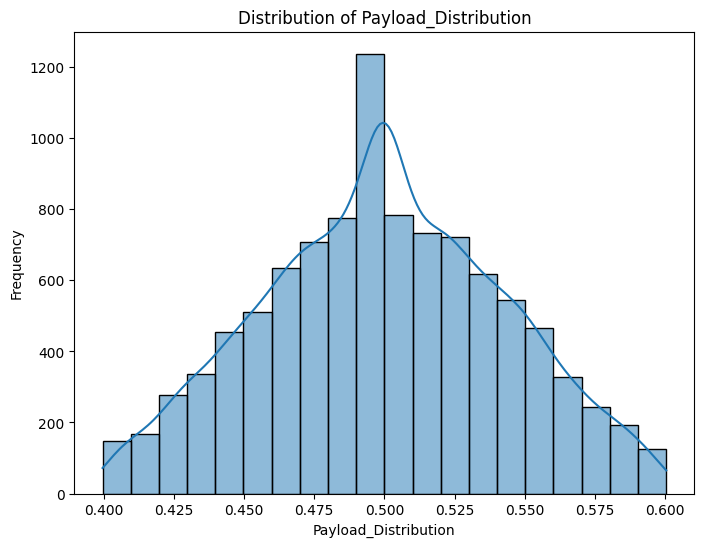

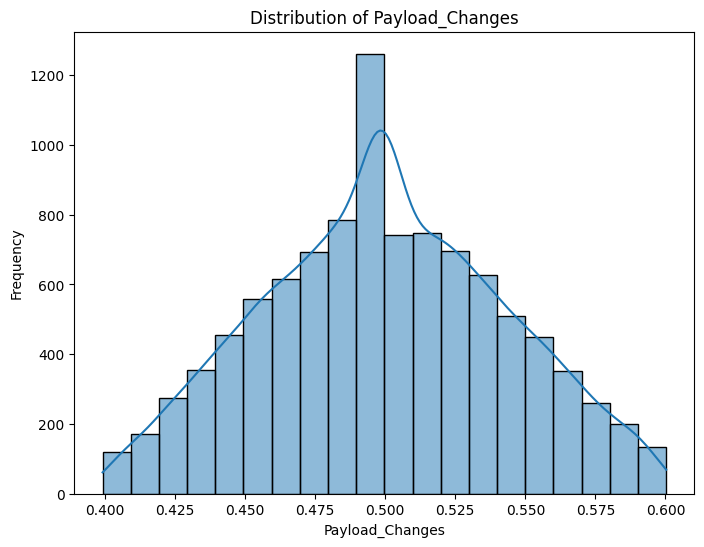

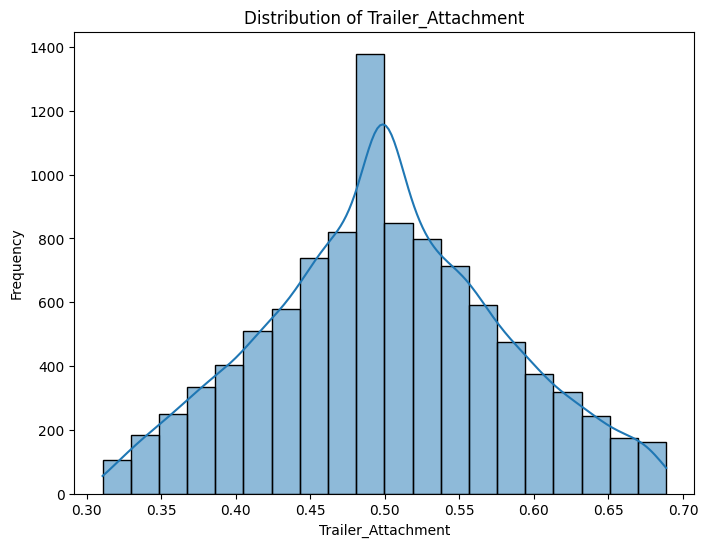

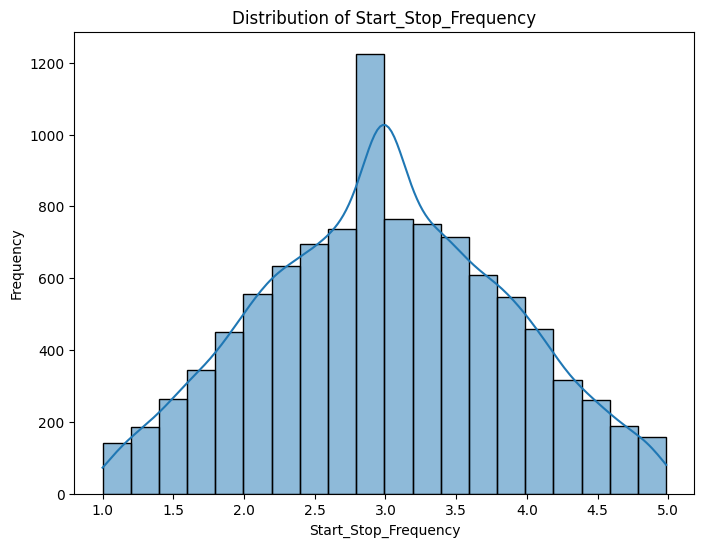

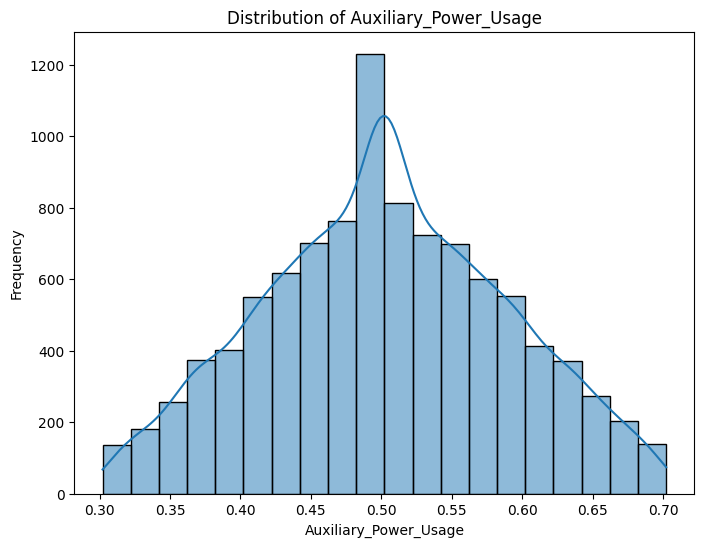

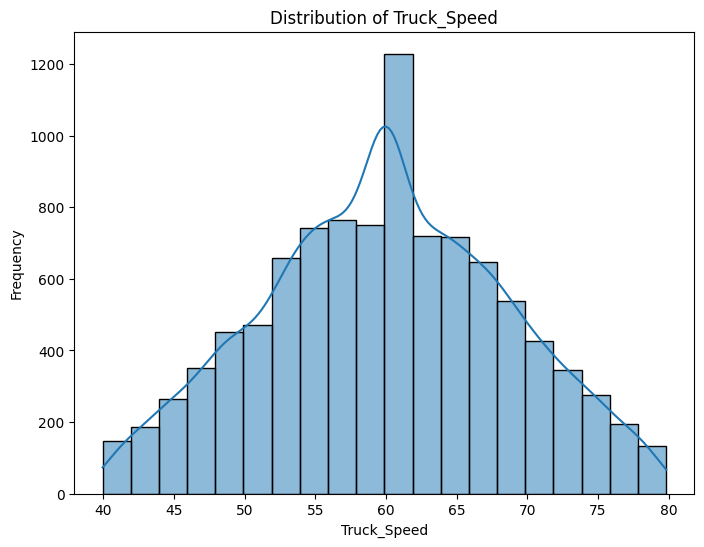

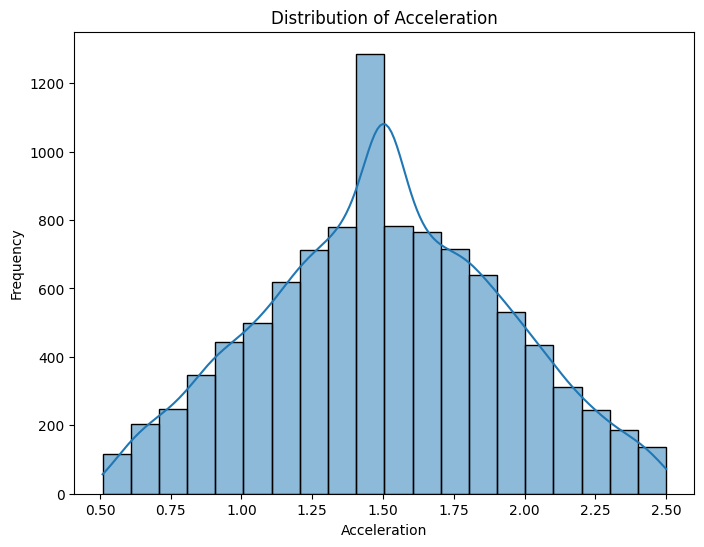

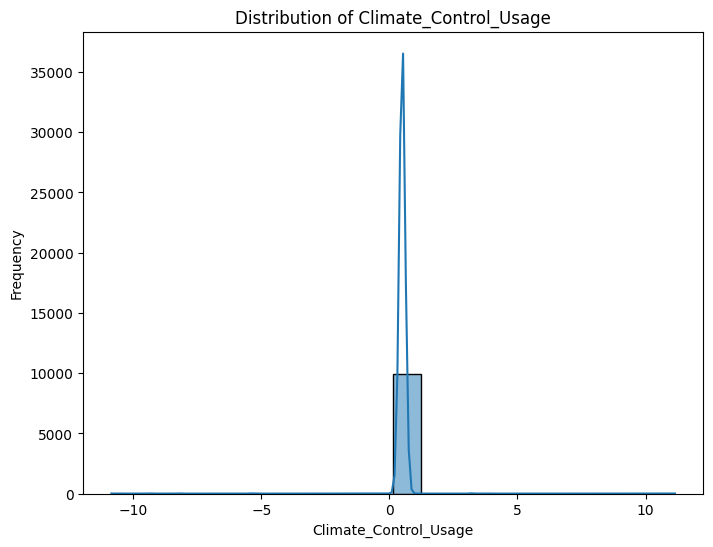

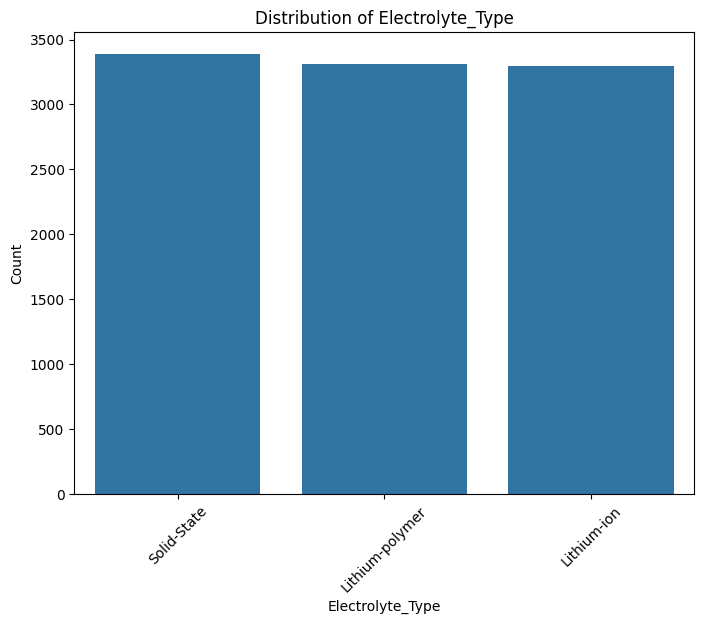

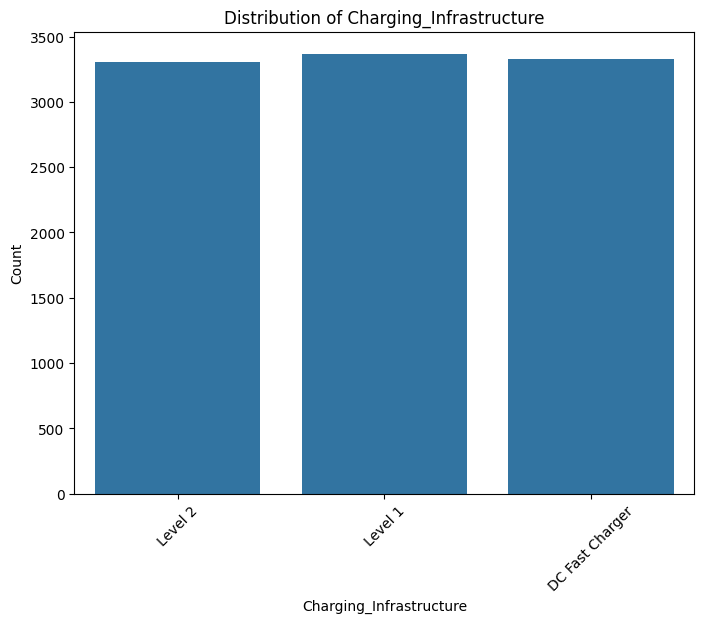

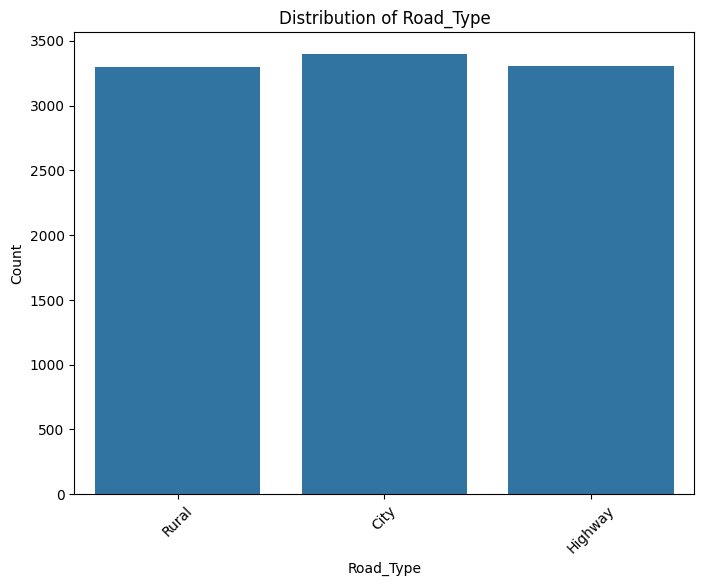

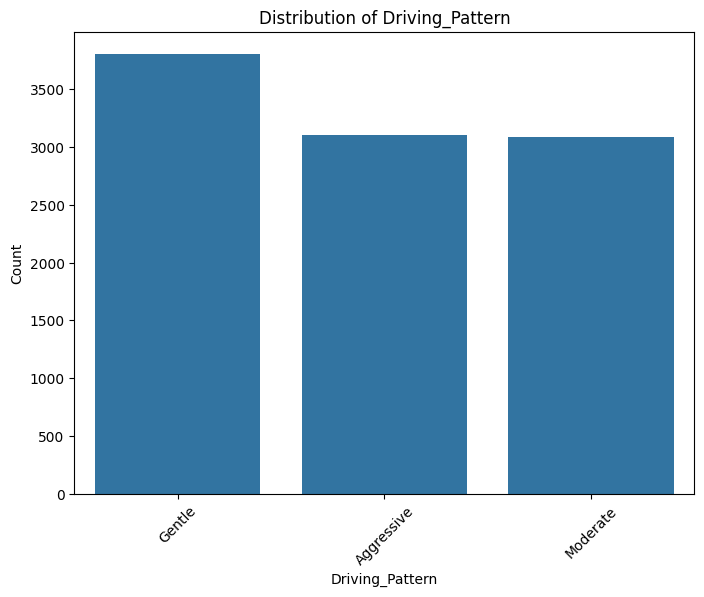

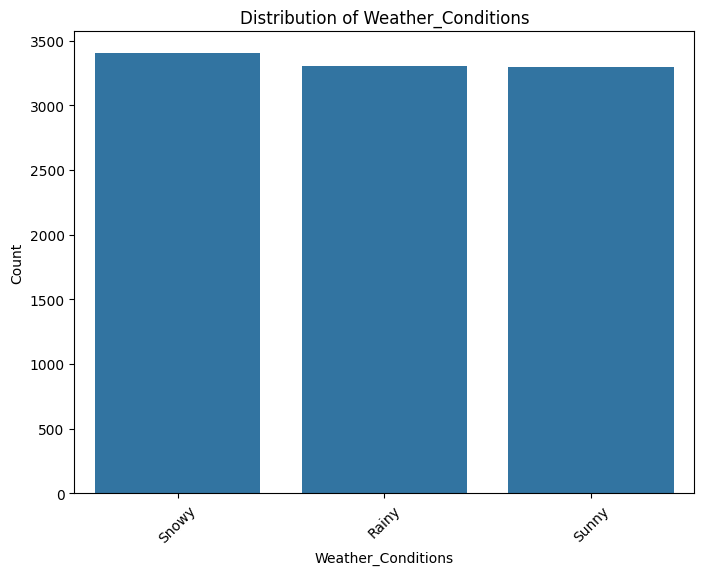

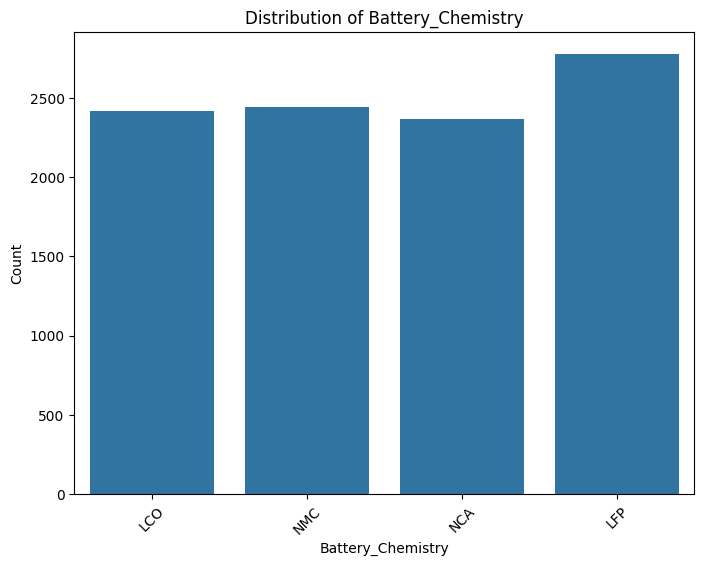

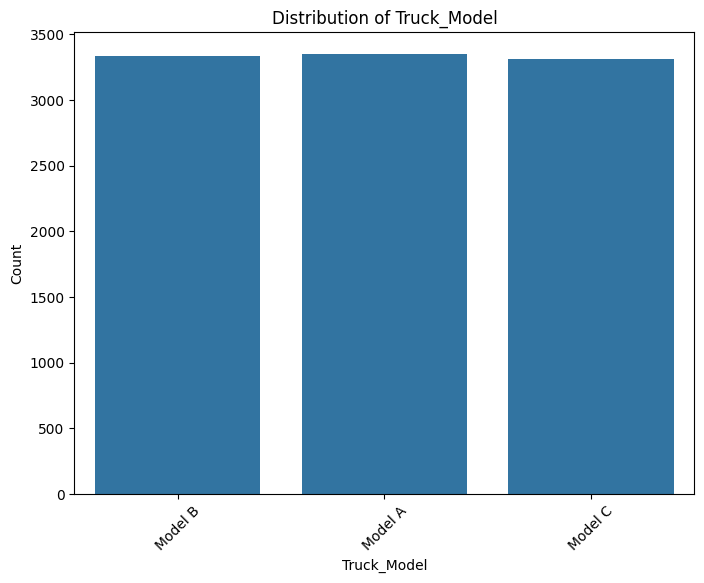

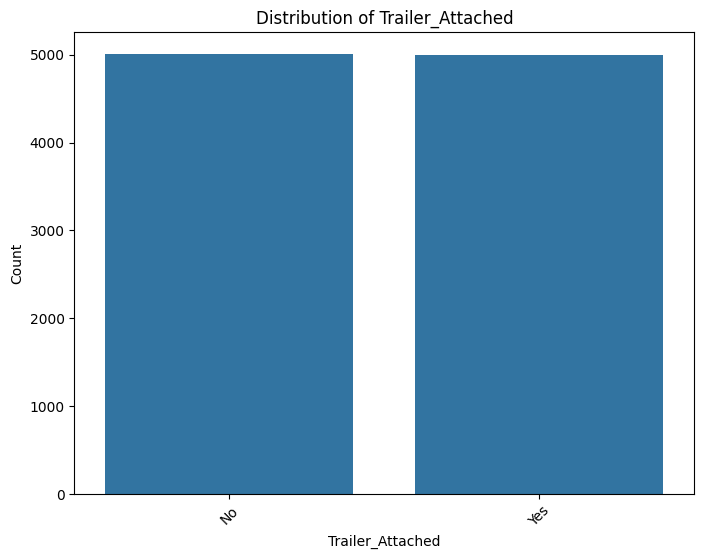

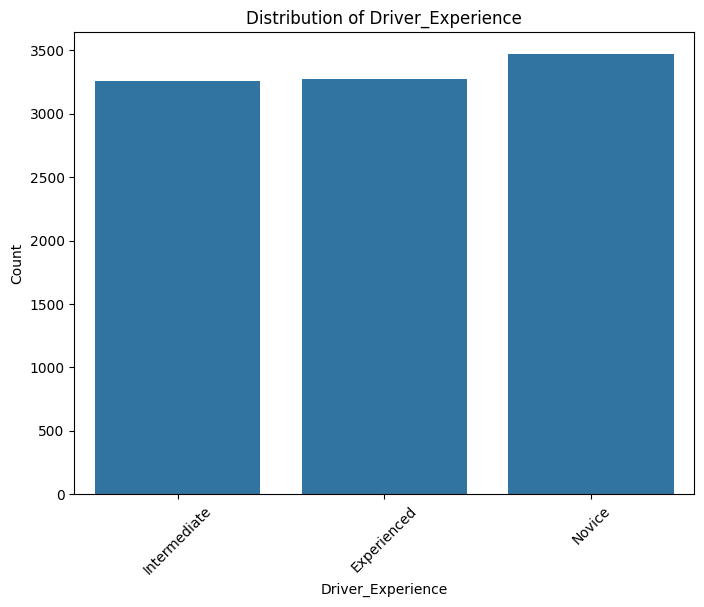

In [36]:

for col in train_df.columns:
    if train_df[col].dtype == 'float64':
        # For numeric columns, create histograms
        plt.figure(figsize=(8, 6))
        sns.histplot(train_df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    elif train_df[col].dtype == 'object':
        # For categorical columns, create bar plots
        plt.figure(figsize=(8, 6))
        sns.countplot(data=train_df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


<Axes: xlabel='Battery_Class'>

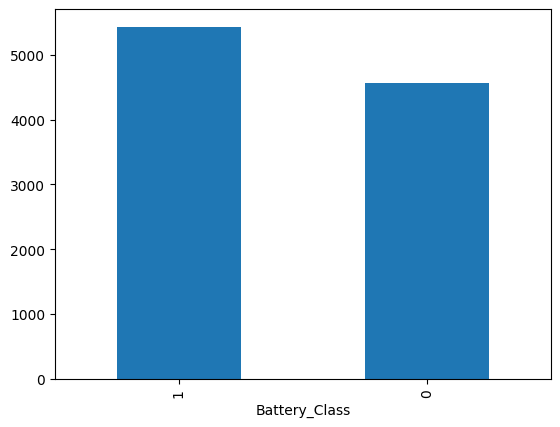

In [37]:
#What is the distribution of the target variable 'Battery_Class'?

train_df['Battery_Class'].value_counts().plot(kind='bar')


In [38]:
#How balanced is the dataset in terms of the target variable?

train_df['Battery_Class'].value_counts(normalize=True)


Battery_Class
1    0.5437
0    0.4563
Name: proportion, dtype: float64

In [39]:
#How do different 'Battery_Chemistry' types affect the distribution of 'Battery_Class'?

<Axes: xlabel='Battery_Chemistry', ylabel='count'>

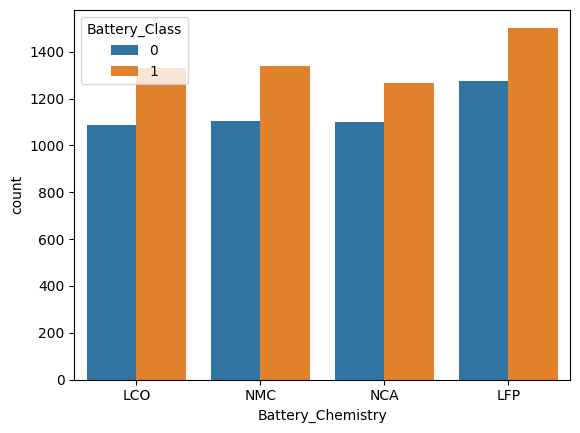

In [40]:
sns.countplot(data=train_df, x='Battery_Chemistry', hue='Battery_Class')

In [42]:
#Are there correlations between numeric features that might impact 'Battery_Class'?
# train_df.corr()

In [43]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [44]:
get_top_abs_correlations(train_df.drop(cat_columns, axis=1),3)

Voltage          Rate_of_Discharge_Peak    0.052441
State_of_Health  Cycle_Life                0.039235
Discharge_Rate   Charging_Time             0.032069
dtype: float64

In [45]:
#What is the relationship between 'State_of_Health' and 'Cycle_Life' for different 'Battery_Chemistry' types?

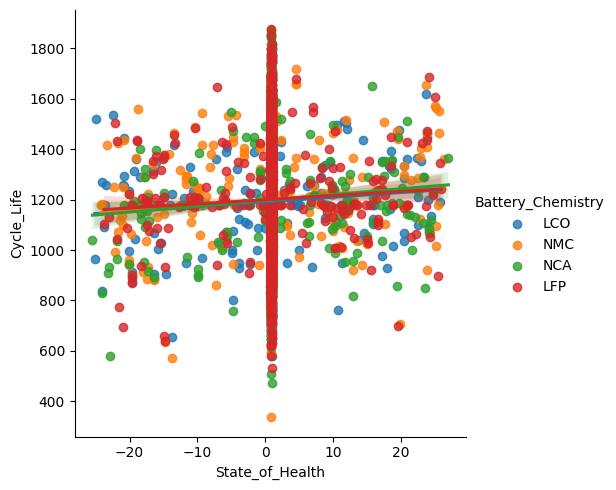

In [46]:
sns.lmplot(data=train_df, x='State_of_Health', y='Cycle_Life', hue='Battery_Chemistry')

<Axes: xlabel='State_of_Charge', ylabel='Depth_of_Discharge'>

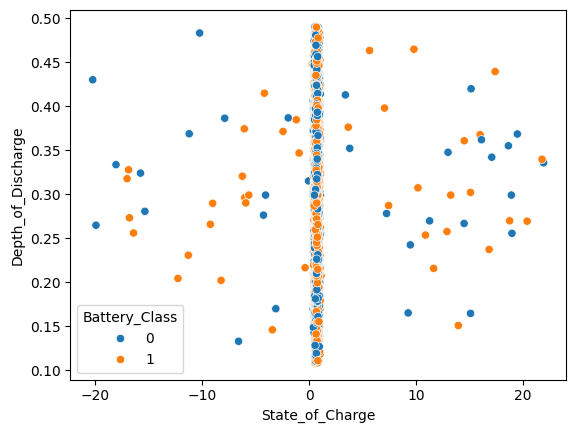

In [47]:
#Are there any interactions between 'State_of_Charge' and 'Depth_of_Discharge' that affect 'Battery_Class'?

sns.scatterplot(data=train_df, x='State_of_Charge', y='Depth_of_Discharge', hue='Battery_Class')


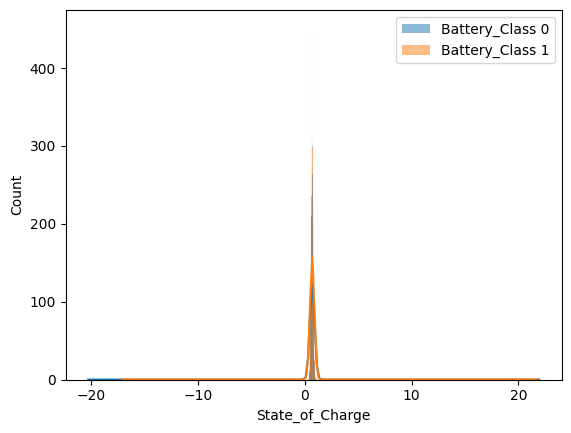

In [48]:
#What is the distribution of 'State_of_Charge' for 'Battery_Class' 0 and 1?

sns.histplot(data=train_df[train_df['Battery_Class'] == 0], x='State_of_Charge', label='Battery_Class 0', kde=True)
sns.histplot(data=train_df[train_df['Battery_Class'] == 1], x='State_of_Charge', label='Battery_Class 1', kde=True)
plt.legend()


<Axes: xlabel='Battery_Class', ylabel='Rate_of_Charge'>

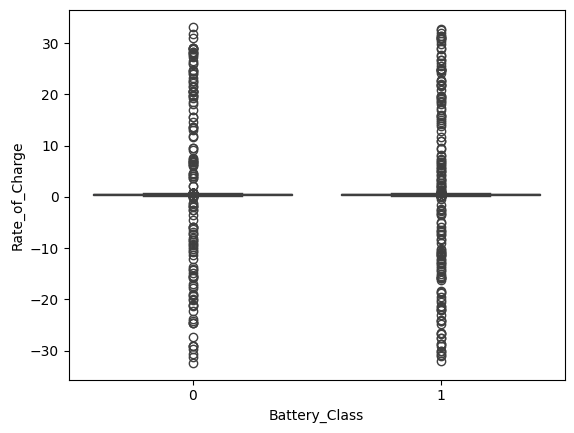

In [49]:
#Are there any outliers in 'Rate_of_Charge' for each 'Battery_Class' group?

sns.boxplot(data=train_df, x='Battery_Class', y='Rate_of_Charge')

<Axes: xlabel='Cycling_Count', ylabel='Depth_of_Discharge'>

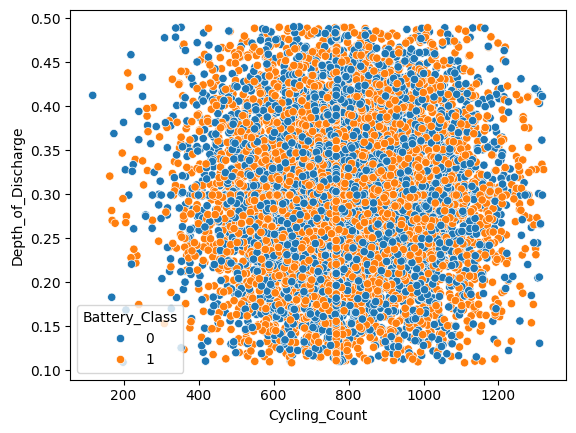

In [50]:
#How do 'Cycling_Count' and 'Depth_of_Discharge' interact to influence 'Battery_Class'?

sns.scatterplot(data=train_df, x='Cycling_Count', y='Depth_of_Discharge', hue='Battery_Class')


In [51]:
#Is 'Charging_Frequency' related to 'Battery_Class'? Conduct a chi-square test.

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_df['Charging_Frequency'], train_df['Battery_Class'])
chi2, p, _, _ = chi2_contingency(contingency_table)

In [52]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=9395.194606287148, pvalue=0.5004037672304346, dof=9396, expected_freq=array([[0.4563, 0.5437],
       [0.4563, 0.5437],
       [0.4563, 0.5437],
       ...,
       [0.4563, 0.5437],
       [0.4563, 0.5437],
       [0.4563, 0.5437]]))

<Axes: xlabel='Battery_Chemistry', ylabel='State_of_Health'>

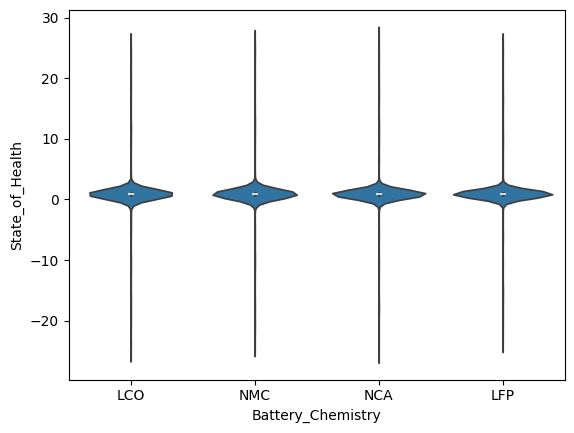

In [53]:
#How does 'State_of_Health' vary with 'Battery_Chemistry'?

sns.violinplot(data=train_df, x='Battery_Chemistry', y='State_of_Health')


<Axes: xlabel='Battery_Chemistry', ylabel='Cycle_Life'>

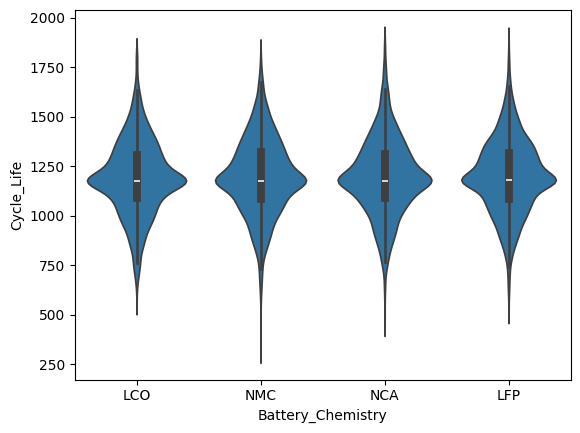

In [54]:
#What is the distribution of 'Cycle_Life' for different 'Battery_Chemistry' types?

sns.violinplot(data=train_df, x='Battery_Chemistry', y='Cycle_Life')


<Axes: xlabel='Battery_Class', ylabel='Depth_of_Discharge'>

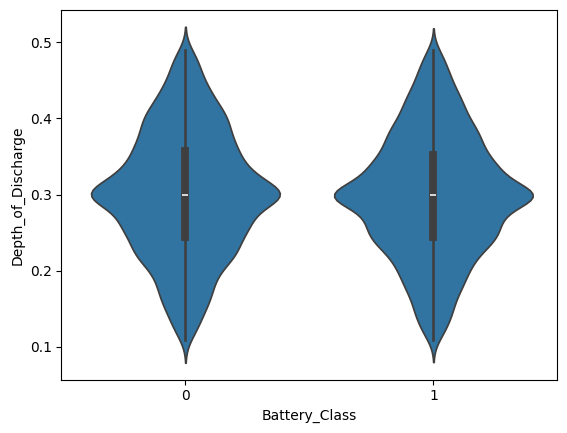

In [55]:
#How does 'Depth_of_Discharge' differ between 'Battery_Class' 0 and 1?

sns.violinplot(data=train_df[train_df['Battery_Class'].isin([0, 1])], x='Battery_Class', y='Depth_of_Discharge')


In [56]:
#Is there a significant difference in 'Rate_of_Charge' between different 'Battery_Chemistry' groups?

from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(*[train_df['Rate_of_Charge'][train_df['Battery_Chemistry'] == chem] for chem in train_df['Battery_Chemistry'].unique()])
p_value

0.141371142722897

In [57]:
#Does 'State_of_Health' differ significantly between 'Battery_Class' 0 and 1?


import scipy.stats as stats

# Two-sample t-test for 'State_of_Health' by 'Battery_Class'
class_0 = train_df[train_df['Battery_Class'] == 0]['State_of_Health']
class_1 = train_df[train_df['Battery_Class'] == 1]['State_of_Health']
t_statistic, p_value = stats.ttest_ind(class_0, class_1)
print("P-value for 'State_of_Health' by 'Battery_Class':", p_value)
if p_value < 0.05:
    print("Inference: There is a significant difference in 'State_of_Health' between Battery_Class 0 and 1.")
else:
    print("Inference: There is no significant difference in 'State_of_Health' between Battery_Class 0 and 1.")

P-value for 'State_of_Health' by 'Battery_Class': 0.7345160735740025
Inference: There is no significant difference in 'State_of_Health' between Battery_Class 0 and 1.


In [58]:
#Is there a significant difference in 'Cycle_Life' between different 'Battery_Class' values?

# One-way ANOVA for 'Cycle_Life' by 'Battery_Class'
f_statistic, p_value = f_oneway(train_df['Cycle_Life'][train_df['Battery_Class'] == 0], train_df['Cycle_Life'][train_df['Battery_Class'] == 1])
print("P-value for 'Cycle_Life' by 'Battery_Class':", p_value)
if p_value < 0.05:
    print("Inference: There is a significant difference in 'Cycle_Life' among Battery_Class groups.")
else:
    print("Inference: There is no significant difference in 'Cycle_Life' among Battery_Class groups.")

P-value for 'Cycle_Life' by 'Battery_Class': 0.3623869811814232
Inference: There is no significant difference in 'Cycle_Life' among Battery_Class groups.


In [59]:



# Two-way ANOVA for 'Rate_of_Charge' by 'Battery_Class' and 'Battery_Chemistry'
model = ols('Rate_of_Charge ~ C(Battery_Class) * C(Battery_Chemistry)', data=train_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("P-value for 'Rate_of_Charge' by 'Battery_Class' and 'Battery_Chemistry':", anova_table.loc['C(Battery_Class):C(Battery_Chemistry)', 'PR(>F)'])
if anova_table.loc['C(Battery_Class):C(Battery_Chemistry)', 'PR(>F)'] < 0.05:
    print("Inference: There is a significant interaction effect of 'Battery_Class' and 'Battery_Chemistry' on 'Rate_of_Charge'.")
else:
    print("Inference: There is no significant interaction effect of 'Battery_Class' and 'Battery_Chemistry' on 'Rate_of_Charge'.")

P-value for 'Rate_of_Charge' by 'Battery_Class' and 'Battery_Chemistry': 0.660562537006552
Inference: There is no significant interaction effect of 'Battery_Class' and 'Battery_Chemistry' on 'Rate_of_Charge'.


In [60]:

# Chi-square test for independence between 'Battery_Class' and 'State_of_Charge'
contingency_table = pd.crosstab(train_df['Battery_Class'], train_df['State_of_Charge'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("P-value for Chi-square test between 'Battery_Class' and 'State_of_Charge':", p_value)
if p_value < 0.05:
    print("Inference: 'Battery_Class' and 'State_of_Charge' are dependent variables.")
else:
    print("Inference: 'Battery_Class' and 'State_of_Charge' are independent variables.")

P-value for Chi-square test between 'Battery_Class' and 'State_of_Charge': 0.49672439956923536
Inference: 'Battery_Class' and 'State_of_Charge' are independent variables.


In [61]:

# Two-sample t-test for 'Cathode_Degradation' by 'Battery_Class' within each 'Battery_Chemistry' type
for chem in train_df['Battery_Chemistry'].unique():
    class_0 = train_df[(train_df['Battery_Class'] == 0) & (train_df['Battery_Chemistry'] == chem)]['Cathode_Degradation']
    class_1 = train_df[(train_df['Battery_Class'] == 1) & (train_df['Battery_Chemistry'] == chem)]['Cathode_Degradation']
    t_statistic, p_value = stats.ttest_ind(class_0, class_1)
    print(f"P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' {chem}:", p_value)
    if p_value < 0.05:
        print(f"Inference: There is a significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")
    else:
        print(f"Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")


P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' LCO: 0.7480892049260506
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' LCO.
P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' NMC: 0.6073114682538558
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' NMC.
P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' NCA: 0.4752221829916219
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' NCA.
P-value for 'Cathode_Degradation' by 'Battery_Class' in 'Battery_Chemistry' LFP: 0.25436690956700875
Inference: There is no significant difference in 'Cathode_Degradation' between Battery_Class 0 and 1 for 'Battery_Chemistry' LFP.


In [62]:



# Mann-Whitney U test for 'Depth_of_Discharge' by 'Battery_Class' within each 'Battery_Chemistry' type
for chem in train_df['Battery_Chemistry'].unique():
    class_0 = train_df[(train_df['Battery_Class'] == 0) & (train_df['Battery_Chemistry'] == chem)]['Depth_of_Discharge']
    class_1 = train_df[(train_df['Battery_Class'] == 1) & (train_df['Battery_Chemistry'] == chem)]['Depth_of_Discharge']
    U_statistic, p_value = mannwhitneyu(class_0, class_1, alternative='two-sided')
    print(f"P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' {chem}:", p_value)
    if p_value < 0.05:
        print(f"Inference: There is a significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")
    else:
        print(f"Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' {chem}.")

P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' LCO: 0.007709191900951998
Inference: There is a significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' LCO.
P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' NMC: 0.8009880624674972
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' NMC.
P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' NCA: 0.945719472735917
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' NCA.
P-value for 'Depth_of_Discharge' by 'Battery_Class' in 'Battery_Chemistry' LFP: 0.7102466369547953
Inference: There is no significant difference in 'Depth_of_Discharge' between Battery_Class 0 and 1 for 'Battery_Chemistry' LFP.


In [63]:

# Pearson correlation test for 'Rate_of_Charge' and 'State_of_Charge'
correlation_coefficient, p_value = pearsonr(train_df['Rate_of_Charge'], train_df['State_of_Charge'])
print("P-value for Pearson correlation test between 'Rate_of_Charge' and 'State_of_Charge':", p_value)
if p_value < 0.05:
    print("Inference: There is a significant positive correlation between 'Rate_of_Charge' and 'State_of_Charge'.")
else:
    print("Inference: There is no significant correlation between 'Rate_of_Charge' and 'State_of_Charge'.")


P-value for Pearson correlation test between 'Rate_of_Charge' and 'State_of_Charge': 0.8794478800080693
Inference: There is no significant correlation between 'Rate_of_Charge' and 'State_of_Charge'.


In [64]:


# Two-sample t-test for 'State_of_Charge' by 'Battery_Class' within each 'Charging_Infrastructure' group
for infrastructure in train_df['Charging_Infrastructure'].unique():
    class_0 = train_df[(train_df['Battery_Class'] == 0) & (train_df['Charging_Infrastructure'] == infrastructure)]['State_of_Charge']
    class_1 = train_df[(train_df['Battery_Class'] == 1) & (train_df['Charging_Infrastructure'] == infrastructure)]['State_of_Charge']
    t_statistic, p_value = stats.ttest_ind(class_0, class_1)
    print(f"P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' {infrastructure}:", p_value)
    if p_value < 0.05:
        print(f"Inference: There is a significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' {infrastructure}.")
    else:
        print(f"Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' {infrastructure}.")


P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' Level 2: 0.2093138238516938
Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' Level 2.
P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' Level 1: 0.7244278221533129
Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' Level 1.
P-value for 'State_of_Charge' by 'Battery_Class' in 'Charging_Infrastructure' DC Fast Charger: 0.8735500272969678
Inference: There is no significant difference in 'State_of_Charge' between Battery_Class 0 and 1 for 'Charging_Infrastructure' DC Fast Charger.


In [65]:
data_backup = train_df.copy()

In [66]:
### Using Feature Selection Technique

In [67]:
#Weight of Evidence and Information Value and Multi-collinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor (X.values, i) for i in range(X.shape[1])]
    return vif


In [70]:
calculate_vif(train_df[num_columns])

,variables,VIF
0,State_of_Charge,1.463240
1,State_of_Health,1.067786
2,Voltage,725.170701
3,Current,15.337460
4,Temperature,9.795902
5,Cycling_Count,19.169215
6,Internal_Resistance,40.217926
7,Rate_of_Charge,1.034575
8,Charge_Discharge_Efficiency,473.077982
9,Depth_of_Discharge,14.734635


In [71]:
def cal_iv_num(df2, feature, target):
    df = df2.copy()
    print(feature)
    lst = []
    df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
    df[feature] = df[feature].fillna(0)
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
    #Split continous variables into max 10 bins based on percentile
    df[feature+'_bin'] = pd.qcut(df[feature], q=100, duplicates='drop')
    for i in range(df[feature+'_bin'].nunique()):
        val = list(df[feature+'_bin'].unique())[i]
        lst.append([feature,
                    val,
                    df[df[feature+'_bin']==val].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==0)].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==1)].count()[feature] 
                    ])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad'])/(data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad']/data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good']/data['Distribution Bad'])
    data = data.replace({'WoE':{np.inf:0, -np.inf:0}})
    data['IV_bin'] = data['WoE']*(data['Distribution Good'] - data['Distribution Bad'])
    data = data.sort_values(by=['Variable','Value'], ascending=[True, True])
    data.index = range(len(data.index))
    data['IV'] = data['IV_bin'].sum()

    return data


def cal_iv_cat(df2, feature, target):
    df = df2.copy()
    print(feature)
    lst = []
    #Ignore features having more than 100 unique values
    if df[feature].nunique()>100:
        return pd.DataFrame()

    df[feature] = df[feature].fillna(0)
    df[feature+'_bin'] = df[feature]

    for i in range(df[feature+'_bin'].nunique()):
        val = list(df[feature+'_bin'].unique())[i]

        lst.append([feature,
                    val,
                    df[df[feature+'_bin']==val].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==0)].count()[feature],
                    df[(df[feature+'_bin']==val) & (df[target]==1)].count()[feature] 
                    ])
    
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All']/data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad'])/(data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad']/data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good']/data['Distribution Bad'])
    data = data.replace({'WoE':{np.inf:0, -np.inf:0}})
    data['IV_bin'] = data['WoE']*(data['Distribution Good'] - data['Distribution Bad'])
    data = data.sort_values(by=['Variable','Value'], ascending=[True, True])
    data.index = range(len(data.index))
    data['IV'] = data['IV_bin'].sum()

    return data


# def iterate_vars_iv(df, Cat_vars, target):
#     data = pd.DataFrame()

#     varlist = list(df.columns)

#     for i in pd.Series(varlist):
#         if str(i) in Cat_vars:
#             data = data.append(cal_iv_cat(df, str(i), target))
#         else:
#             data = data.append(cal_iv_num(df, str(i), target))

#     return data

In [72]:
def iterate_vars_iv(df, Cat_vars, target):
    iv_data_list = []

    varlist = list(df.columns)

    for var in varlist:
        if var in Cat_vars:
            iv_data_list.append(cal_iv_cat(df, var, target))
        else:
            iv_data_list.append(cal_iv_num(df, var, target))

    return pd.concat(iv_data_list, ignore_index=True)

In [73]:
iv_df = iterate_vars_iv(train_df, cat_columns,'Battery_Class')

State_of_Charge
State_of_Health
Voltage
Current
Temperature
Cycling_Count
Internal_Resistance
Rate_of_Charge
Charge_Discharge_Efficiency
Depth_of_Discharge
Charge_Rate
Discharge_Rate
Voltage_Sag
Cell_Balancing_Status
Self_Discharge_Rate
EIS_Data
Cycle_Life
Max_Charge_Power
Max_Discharge_Power
Anode_Degradation
Cathode_Degradation
Electrolyte_Level
Chemical_Composition
Rate_of_Charge_Peak
Rate_of_Discharge_Peak
Calendar_Aging
Cell_Voltage_Balance
Altitude_Change
Tire_Pressure
Regenerative_Braking
Load_Weight
Road_Inclination
Idle_Time
Charging_Time
Charging_Frequency
Payload_Distribution
Payload_Changes
Trailer_Attachment
Start_Stop_Frequency
Auxiliary_Power_Usage
Truck_Speed
Acceleration
Climate_Control_Usage
Electrolyte_Type
Charging_Infrastructure
Road_Type
Driving_Pattern
Weather_Conditions
Battery_Chemistry
Truck_Model
Trailer_Attached
Driver_Experience
Battery_Class


In [74]:
iv_df[['Variable','WoE','IV']].drop_duplicates(subset = 'Variable', keep='last').reset_index(drop=True)

,Variable,WoE,IV
0,State_of_Charge,0.055103,3.778337e-02
1,State_of_Health,-0.314301,3.673206e-02
2,Voltage,-0.147526,3.929829e-02
3,Current,-0.188718,4.867606e-02
4,Temperature,0.095204,4.604683e-02
5,Cycling_Count,-0.230218,4.382750e-02
6,Internal_Resistance,0.095204,4.974612e-02
7,Rate_of_Charge,0.055103,3.580276e-02
8,Charge_Discharge_Efficiency,-0.025424,5.523790e-02
9,Depth_of_Discharge,0.135242,4.152739e-02


In [75]:
le = LabelEncoder()

for col in train_df[cat_columns].columns:
    train_df[col] = le.fit_transform(train_df[col])
    train_df[col] = train_df[col].astype('category')

In [76]:
X_train = train_df.drop(['Battery_Class'], axis=1)

In [77]:
y_train = train_df['Battery_Class']

In [78]:
classifier= RandomForestClassifier(n_estimators=100, max_depth=10)

In [79]:
n_features_to_select = 15
rfe = RFE(classifier, n_features_to_select = n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=10), n_features_to_select=15)

In [80]:
from operator import itemgetter
features = X_train.columns.to_list()
for x, y,z in (sorted(zip(rfe.support_,rfe.ranking_ , features), key=itemgetter(0))):
    print(x,'__Rank',y,  '__' ,z) 

False __Rank 26 __ State_of_Charge
False __Rank 10 __ State_of_Health
False __Rank 25 __ Voltage
False __Rank 4 __ Temperature
False __Rank 16 __ Cycling_Count
False __Rank 28 __ Rate_of_Charge
False __Rank 7 __ Depth_of_Discharge
False __Rank 22 __ Charge_Rate
False __Rank 19 __ Cell_Balancing_Status
False __Rank 13 __ EIS_Data
False __Rank 15 __ Cycle_Life
False __Rank 27 __ Anode_Degradation
False __Rank 14 __ Cathode_Degradation
False __Rank 21 __ Electrolyte_Level
False __Rank 29 __ Rate_of_Charge_Peak
False __Rank 3 __ Calendar_Aging
False __Rank 6 __ Cell_Voltage_Balance
False __Rank 20 __ Tire_Pressure
False __Rank 17 __ Regenerative_Braking
False __Rank 23 __ Road_Inclination
False __Rank 2 __ Idle_Time
False __Rank 12 __ Charging_Time
False __Rank 24 __ Charging_Frequency
False __Rank 11 __ Payload_Changes
False __Rank 8 __ Start_Stop_Frequency
False __Rank 18 __ Auxiliary_Power_Usage
False __Rank 9 __ Truck_Speed
False __Rank 5 __ Acceleration
False __Rank 33 __ Electrolyte_

In [81]:
Feature_importance_DF = pd.DataFrame(zip(rfe.support_,rfe.ranking_ ,features),columns=['Support','Rank','Columns'])

In [82]:
Important_Features = Feature_importance_DF[Feature_importance_DF['Rank']==1]['Columns'].to_list()

In [83]:
print(Important_Features)

['Current', 'Internal_Resistance', 'Charge_Discharge_Efficiency', 'Discharge_Rate', 'Voltage_Sag', 'Self_Discharge_Rate', 'Max_Charge_Power', 'Max_Discharge_Power', 'Chemical_Composition', 'Rate_of_Discharge_Peak', 'Altitude_Change', 'Load_Weight', 'Payload_Distribution', 'Trailer_Attachment', 'Climate_Control_Usage']


<Axes: >

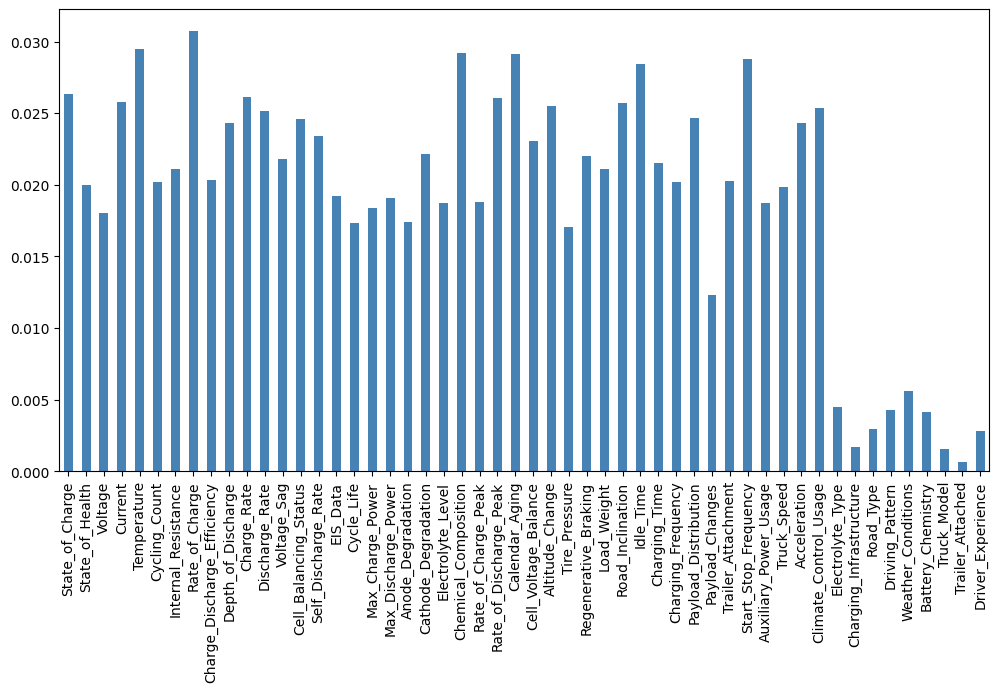

In [84]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

pd.Series(clf.feature_importances_, index=X_train.columns[:]).plot.bar(color='steelblue', figsize=(12, 6))

In [85]:
# from pycaret.classification import * 

In [86]:
# exp_clf = setup(train_df, target='Battery_Class',imputation_type='iterative',fix_imbalance = True)

In [87]:
# top3 = compare_models()

In [88]:
train_df.to_csv('../data/processed_data_10k.csv', index=False)